In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df = pd.read_csv("Rice_MSC_Dataset.csv")


In [3]:
print("The dataset has", df.shape[0], "rows and", df.shape[1], "columns.")


The dataset has 75000 rows and 107 columns.


In [4]:
df.head()


AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0  7805    437.915    209.8215     48.0221        0.9735   99.6877    0.9775   
1  7503    340.757    138.3361     69.8417        0.8632   97.7400    0.9660   
2  5124    314.617    141.9803     46.5784        0.9447   80.7718    0.9721   
3  7990    437.085    201.4386     51.2245        0.9671  100.8622    0.9659   
4  7433    342.893    140.3350     68.3927        0.8732   97.2830    0.9831   

   CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  ALLdaub4L  ALLdaub4a  ALLdaub4b  \
0         7985  0.3547        4.3693  ...   113.9924    65.0610    59.5989   
1         7767  0.6637        1.9807  ...   105.7055    64.3685    62.2084   
2         5271  0.4760        3.0482  ...   109.7155    62.6423    58.7439   
3         8272  0.6274        3.9325  ...   116.5405    64.9069    60.2562   
4         7561  0.6006        2.0519  ...   107.7502    64.7071    61.3549   

   ALLdaub4Y  ALLdaub4Cb  ALLdaub4Cr  ALLdaub4XX  ALLdaub4YY  ALLdaub4ZZ  \
0   104.8552     67.8779     63.0828      0.3673      0.3793      0.4733   
1    96.8375     65.5371     63.5832      0.3014      0.3144      0.3641   
2   100.2352     68.9753     59.8342      0.3233      0.3445      0.4448   
3   107.2560     67.3298     63.2237      0.3880      0.4020      0.4904   
4    98.8704     66.2048     63.5378      0.3184      0.3303      0.3928   

     CLASS  
0  Basmati  
1  Arborio  
2  Jasmine  
3  Basmati  
4  Arborio  

[5 rows x 107 columns]

In [5]:
print("Number of instances:", df.shape[0])
print("Number of attributes:", df.shape[1])


Number of instances: 75000
Number of attributes: 107


In [6]:
print(df.isnull().sum())


AREA            0
PERIMETER       0
MAJOR_AXIS      0
MINOR_AXIS      0
ECCENTRICITY    0
               ..
ALLdaub4Cr      0
ALLdaub4XX      0
ALLdaub4YY      0
ALLdaub4ZZ      0
CLASS           0
Length: 107, dtype: int64


In [7]:
# Create a boolean DataFrame indicating where null values are present
null_df = df.isnull()

# Use boolean indexing to extract rows and columns with null values
null_cells = df[null_df]

print(null_cells)

       AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY  EQDIASQ  \
0       NaN        NaN         NaN         NaN           NaN      NaN   
1       NaN        NaN         NaN         NaN           NaN      NaN   
2       NaN        NaN         NaN         NaN           NaN      NaN   
3       NaN        NaN         NaN         NaN           NaN      NaN   
4       NaN        NaN         NaN         NaN           NaN      NaN   
...     ...        ...         ...         ...           ...      ...   
74995   NaN        NaN         NaN         NaN           NaN      NaN   
74996   NaN        NaN         NaN         NaN           NaN      NaN   
74997   NaN        NaN         NaN         NaN           NaN      NaN   
74998   NaN        NaN         NaN         NaN           NaN      NaN   
74999   NaN        NaN         NaN         NaN           NaN      NaN   

       SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  ALLdaub4L  ALLdaub4a  \
0           NaN          NaN     NaN      

In [8]:
pip install prettytable


Note: you may need to restart the kernel to use updated packages.


In [9]:
from prettytable import PrettyTable


table = PrettyTable()
table.field_names = ["Information", "Value"]

table.add_row(["Dataset Characteristics", "Rice MSC Dataset"])
table.add_row(["Attribute Characteristics", "Numerical, Multivariate"])
table.add_row(["Associated Tasks", "Classification, Regression"])
table.add_row(["Number of Instances", "75000"])
table.add_row(["Number of Attributes", "107"])
table.add_row(["Missing Values", "No"])
table.add_row(["Area", "Agriculture"])
table.add_row(["Date of Download", "April 7, 2023"])

print(table)


+---------------------------+----------------------------+
|        Information        |           Value            |
+---------------------------+----------------------------+
|  Dataset Characteristics  |      Rice MSC Dataset      |
| Attribute Characteristics |  Numerical, Multivariate   |
|      Associated Tasks     | Classification, Regression |
|    Number of Instances    |           75000            |
|    Number of Attributes   |            107             |
|       Missing Values      |             No             |
|            Area           |        Agriculture         |
|      Date of Download     |       April 7, 2023        |
+---------------------------+----------------------------+


In [10]:
print(df.describe())


               AREA     PERIMETER    MAJOR_AXIS    MINOR_AXIS  ECCENTRICITY  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean    8379.197507    378.169453    161.805540     66.829335      0.886077   
std     3119.209274     70.597008     36.461005     16.689269      0.071906   
min     3929.000000    261.040000     96.968300     34.673000      0.627700   
25%     6259.000000    316.431500    132.623500     49.650200      0.846100   
50%     7345.000000    351.261000    149.343950     69.183900      0.885600   
75%     8901.000000    444.986000    197.462025     75.814125      0.950800   
max    21019.000000    593.698000    255.647200    113.441100      0.986800   

            EQDIASQ      SOLIDITY   CONVEX_AREA        EXTENT  ASPECT_RATIO  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean     101.731251      0.975896   8584.862320      0.633226      2.597063   
std       17.874070      0.007966   3189.298025    

C:\Users\apanda4\AppData\Local\Temp\ipykernel_21596\1896765959.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(ncols=2, figsize=(7, 3))


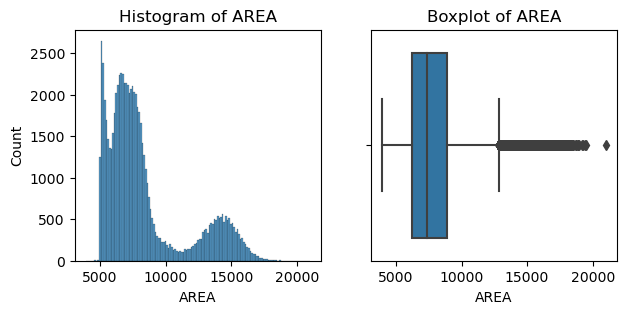

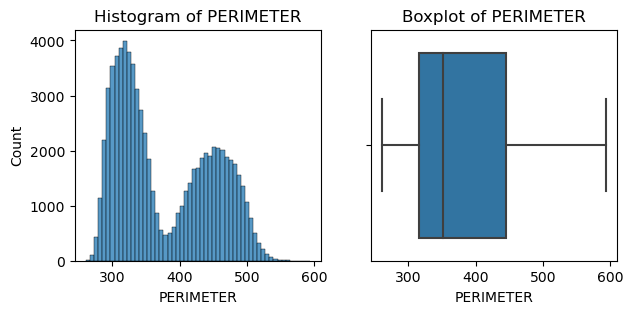

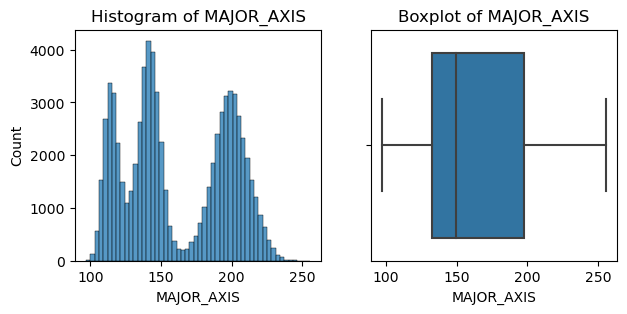

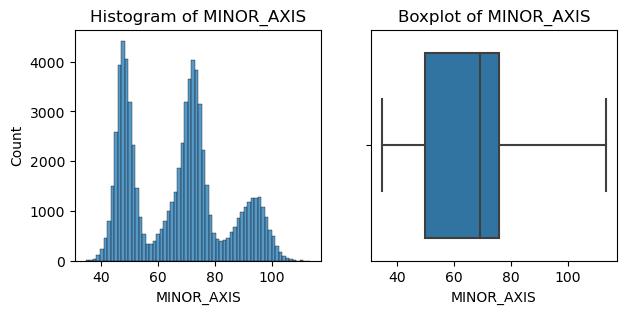

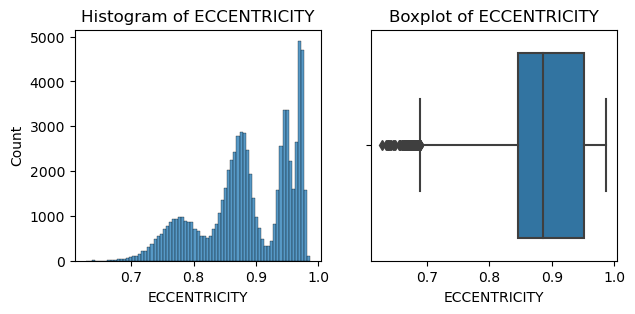

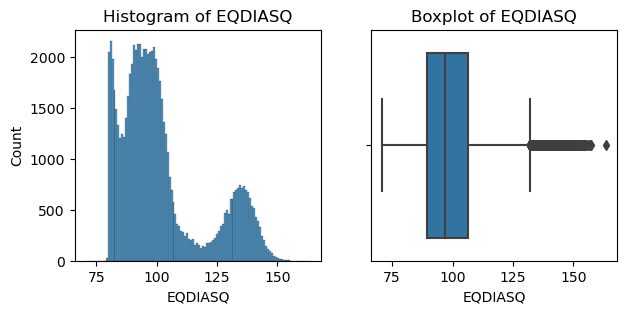

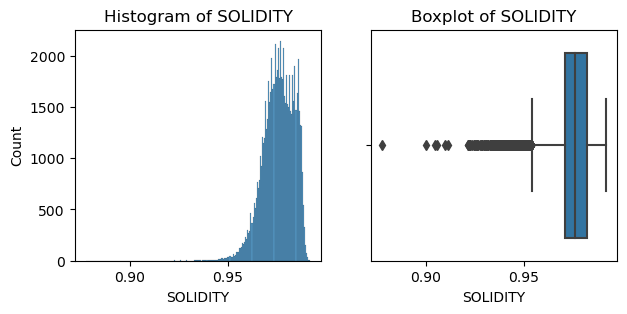

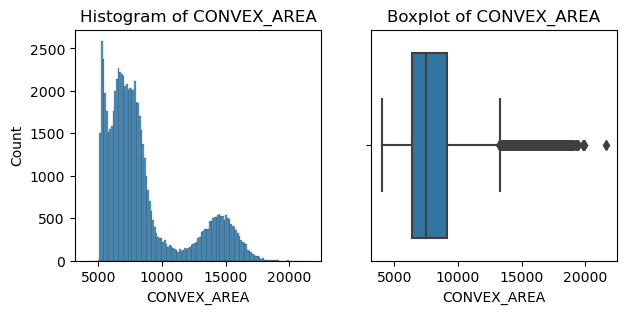

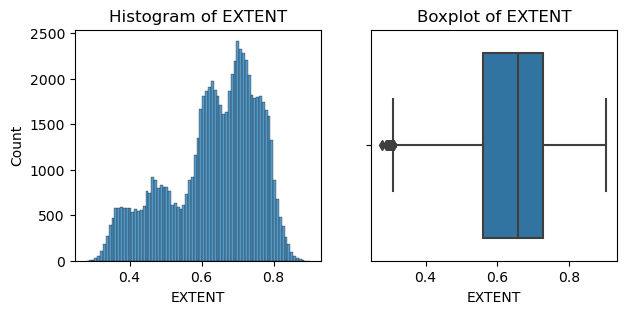

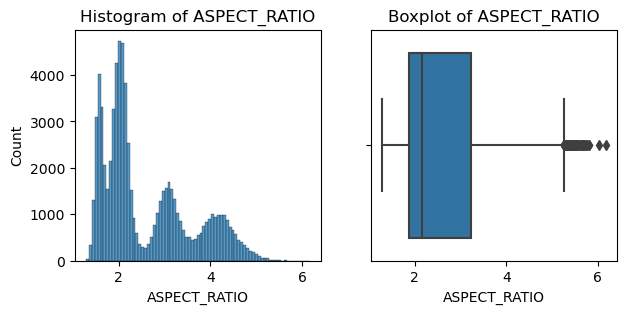

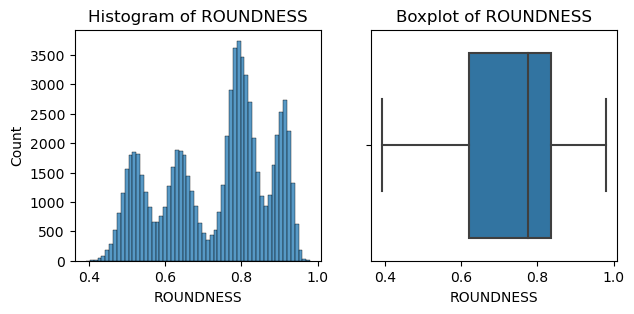

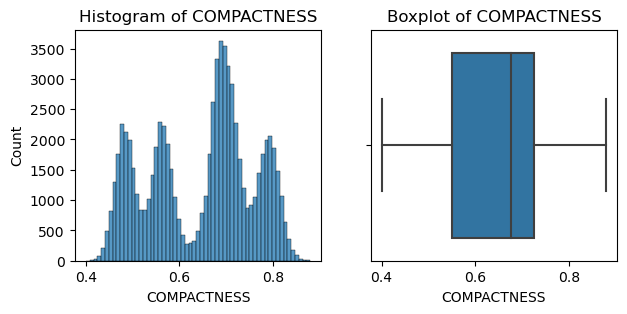

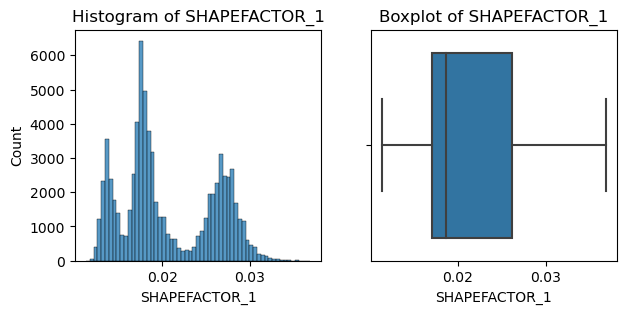

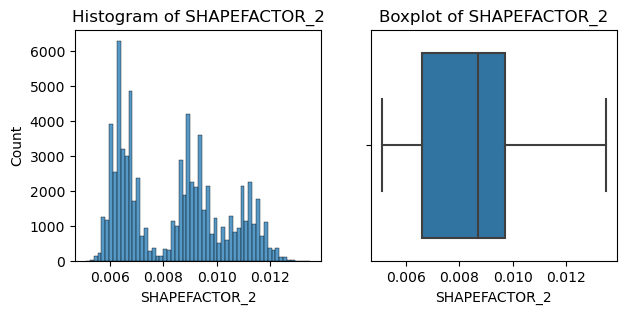

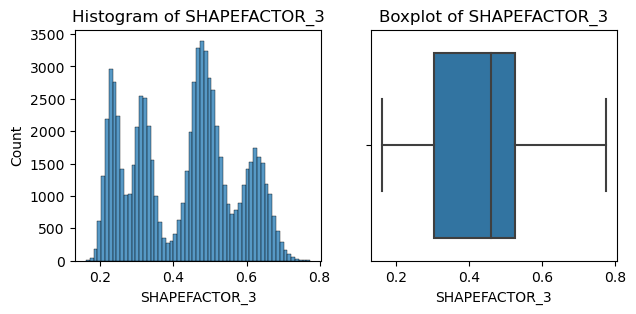

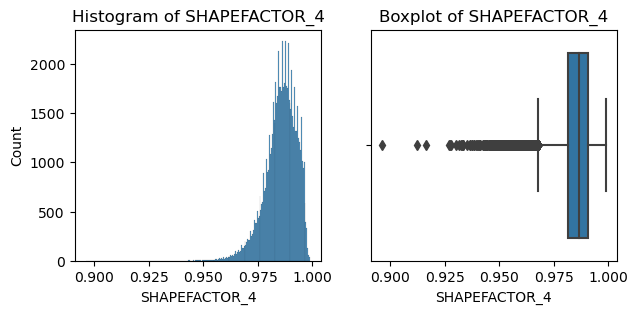

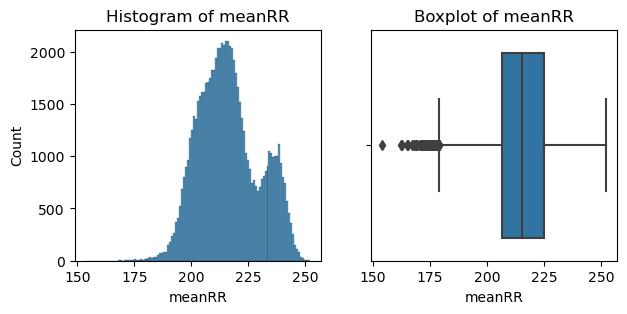

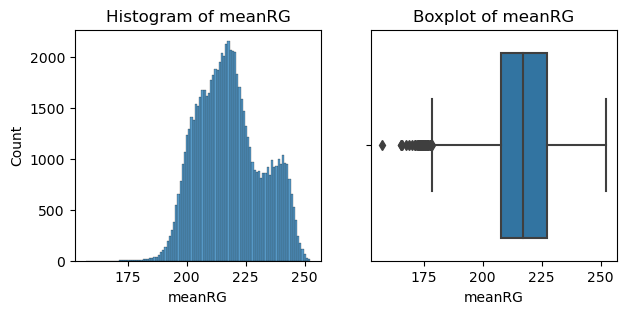

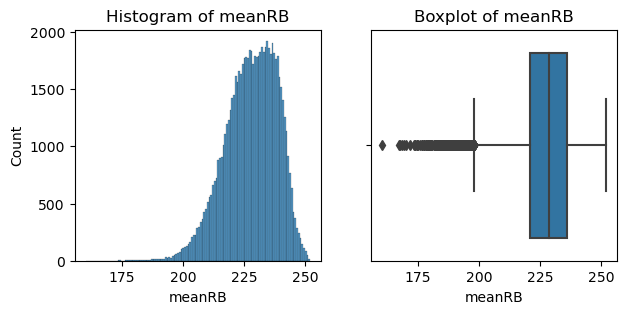

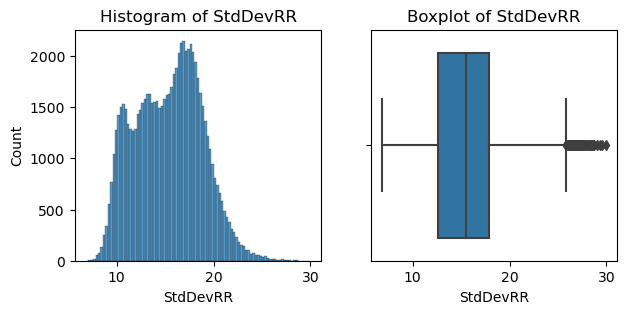

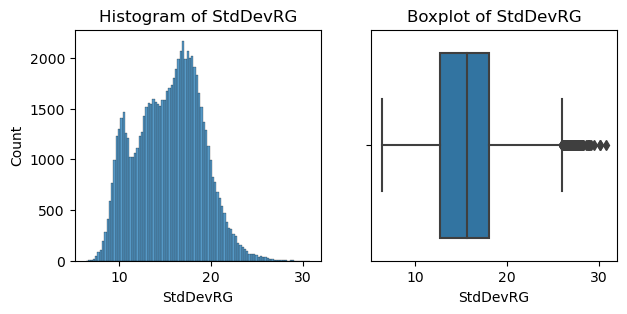

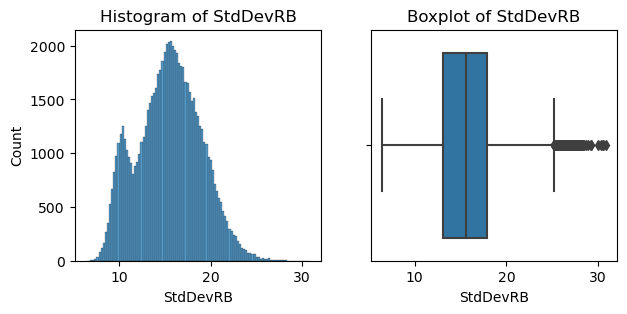

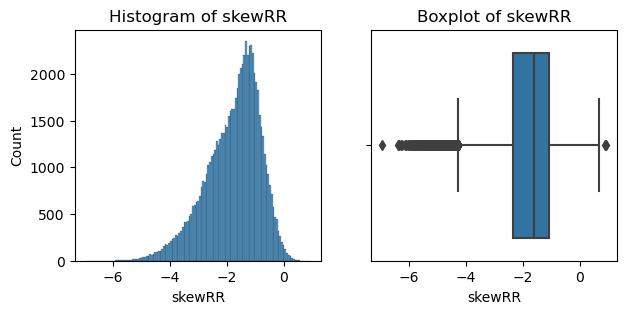

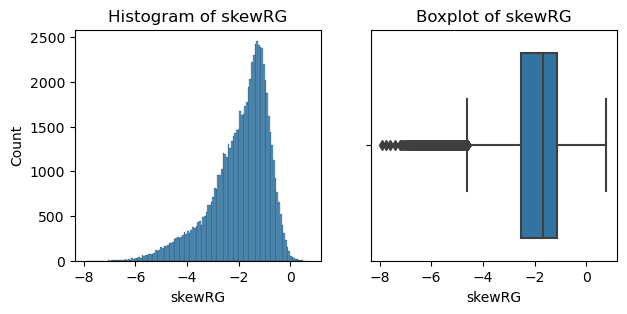

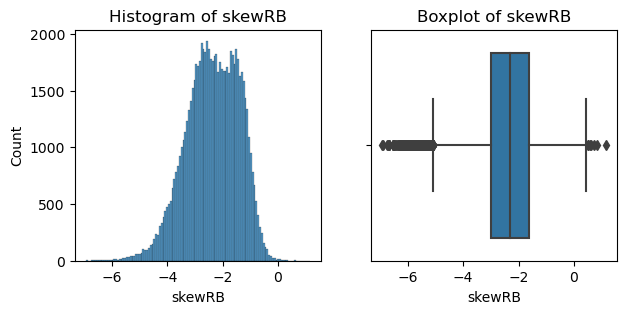

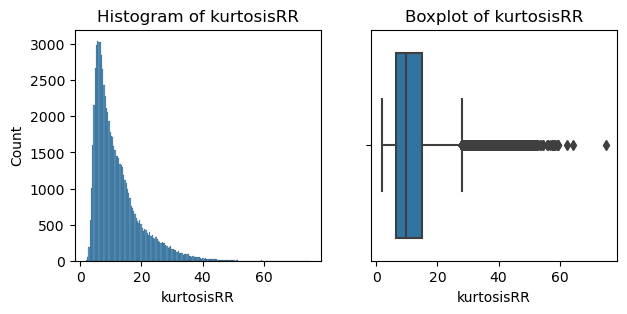

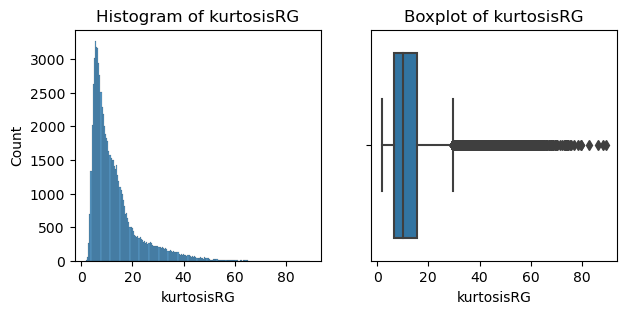

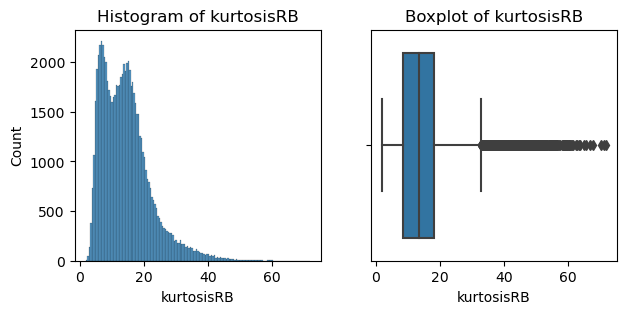

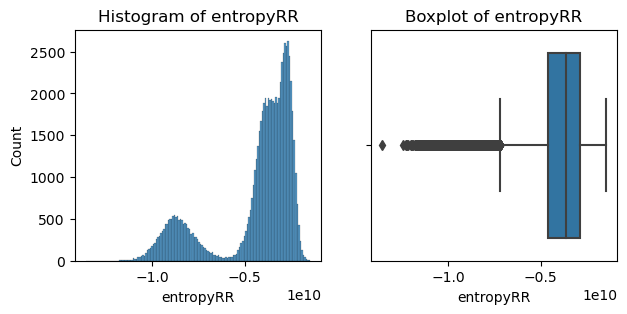

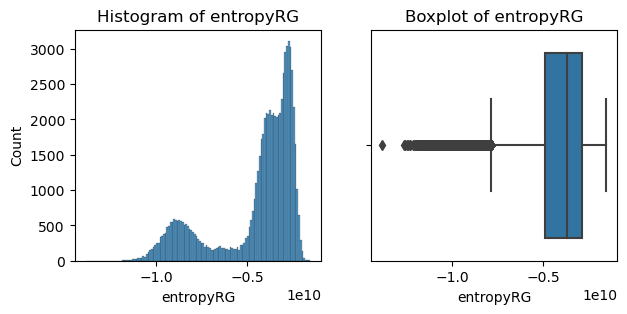

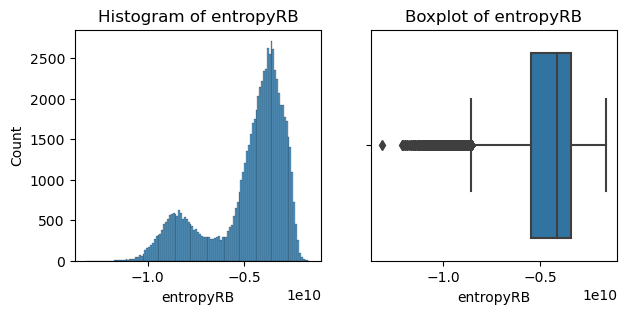

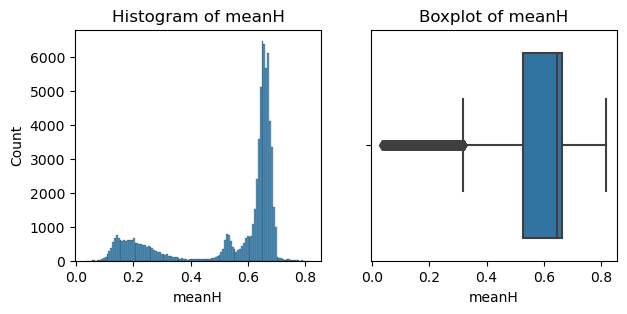

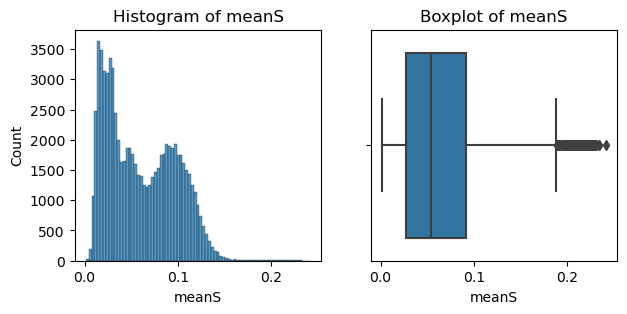

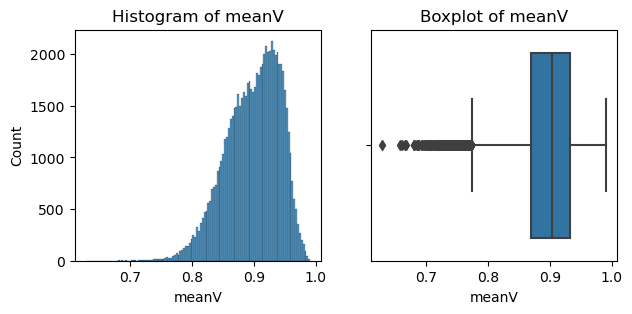

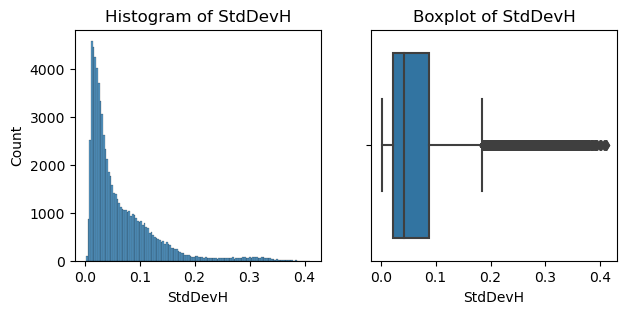

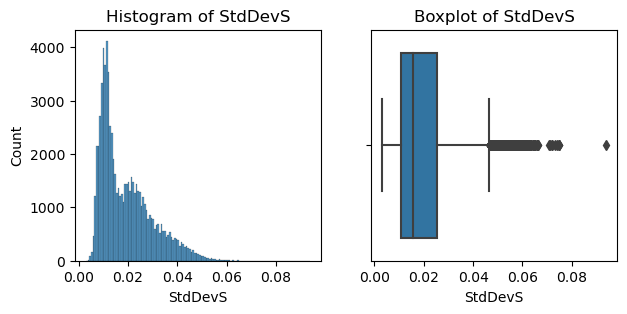

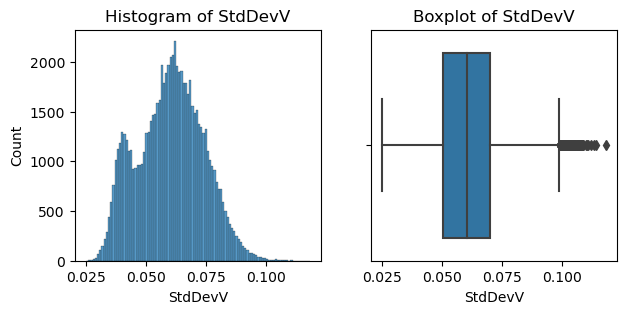

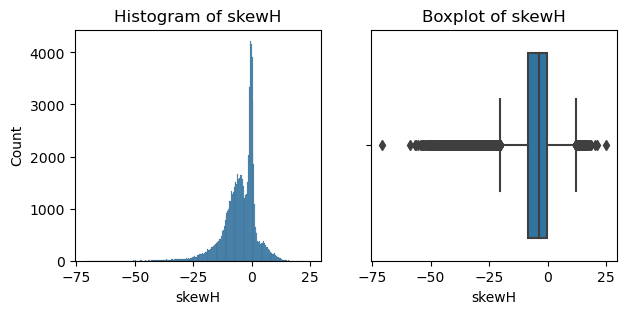

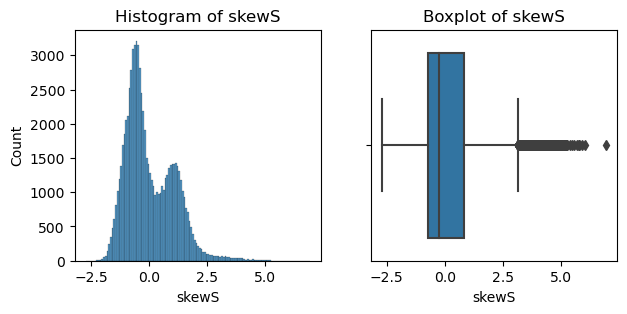

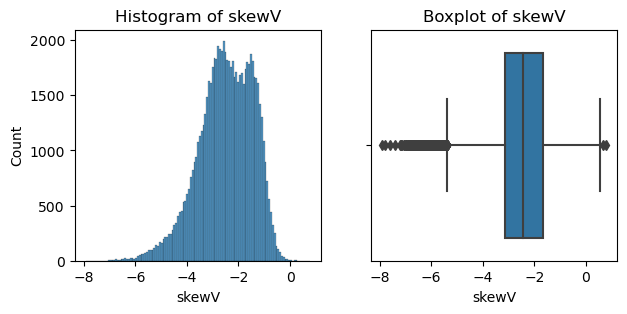

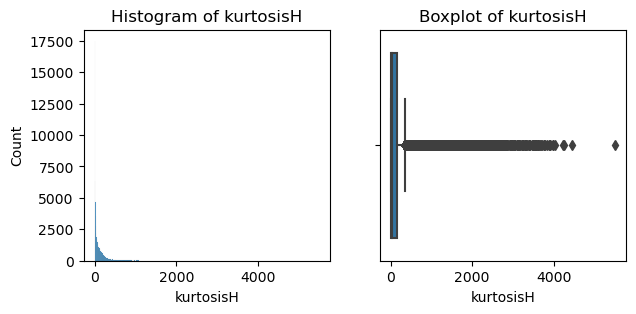

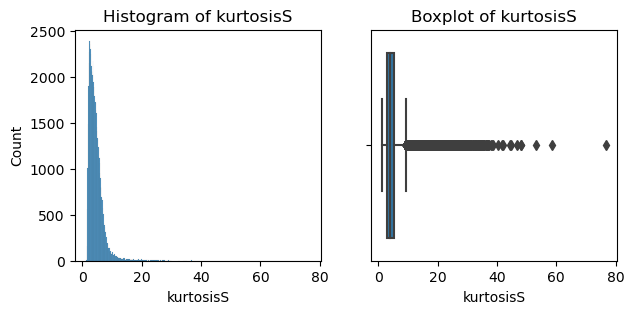

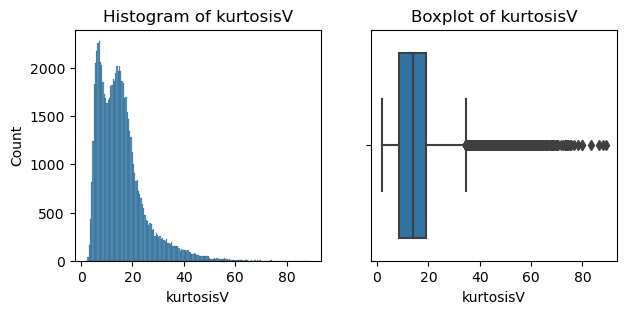

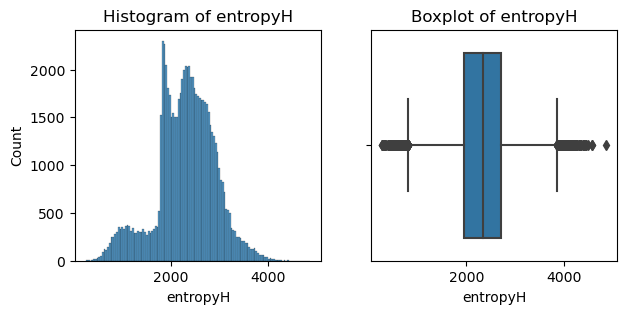

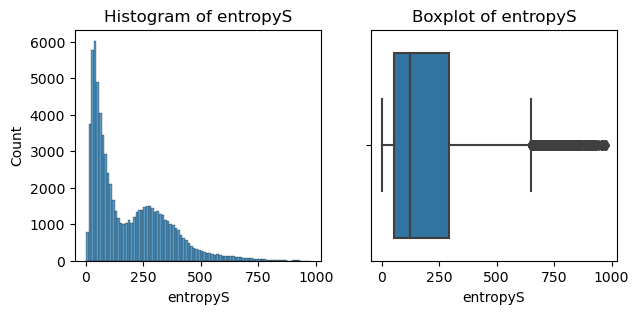

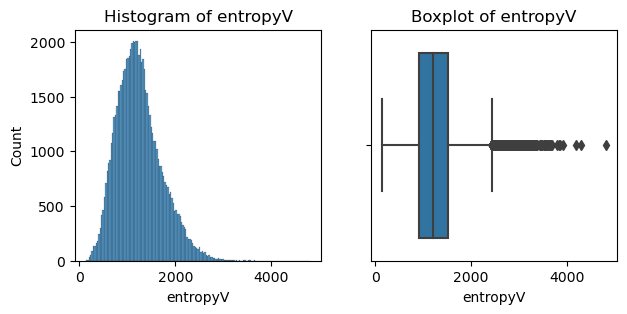

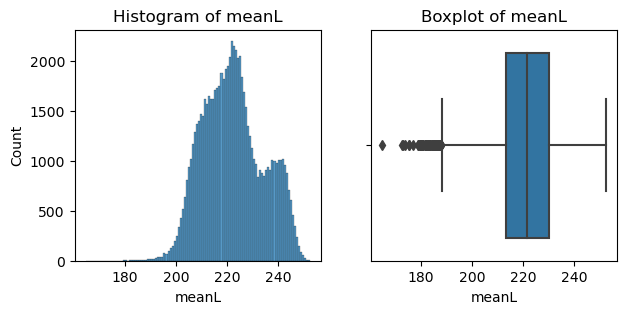

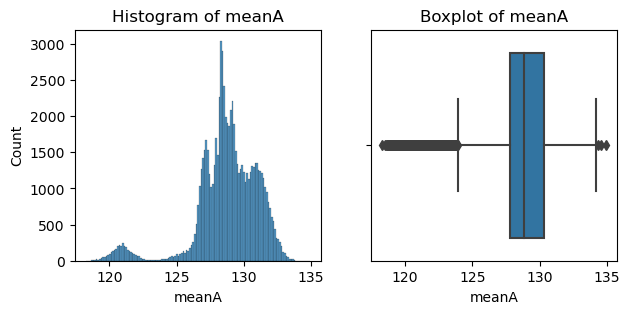

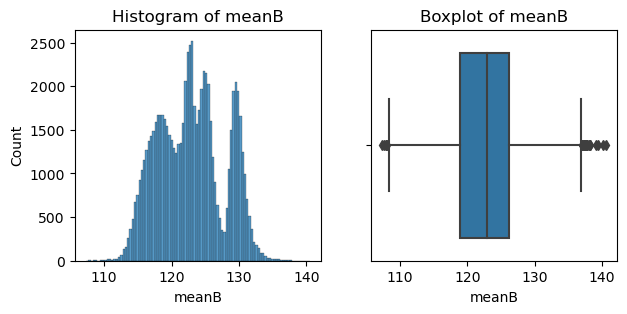

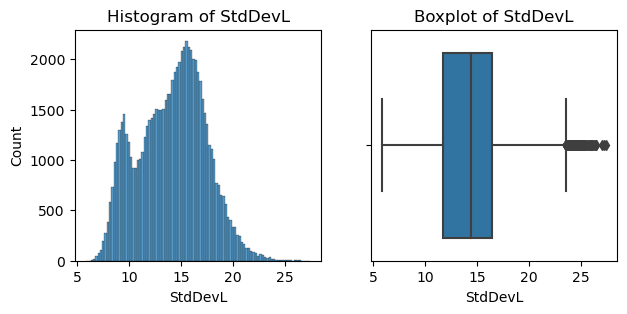

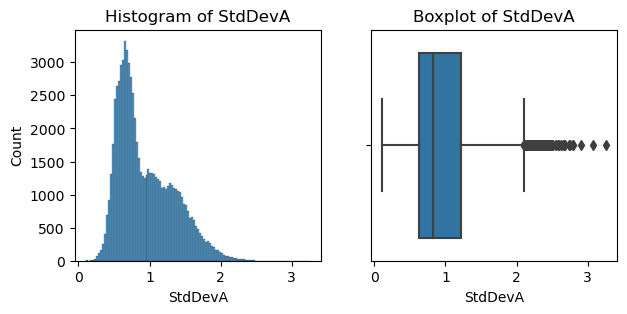

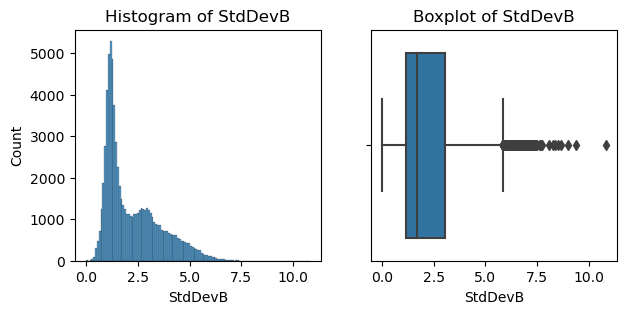

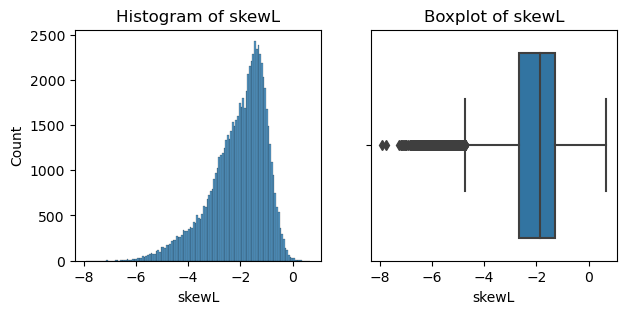

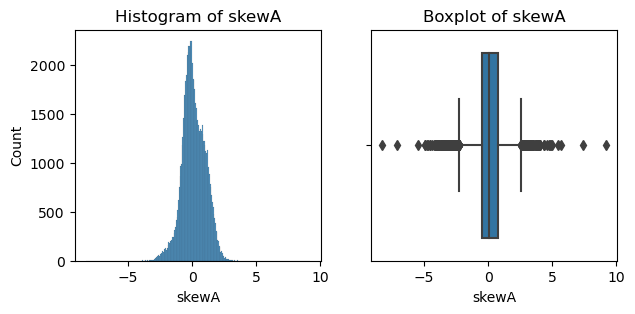

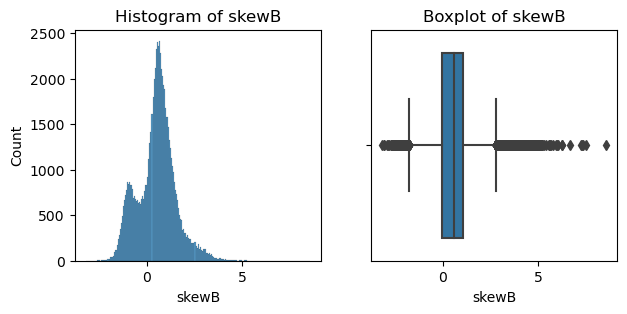

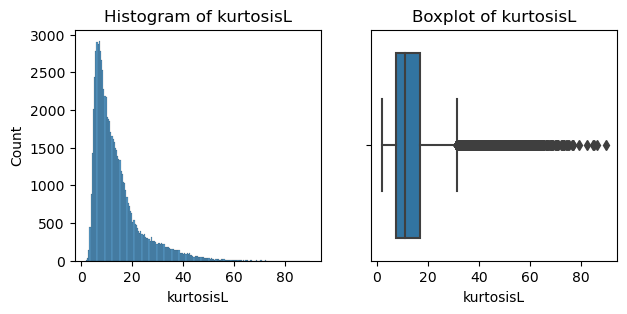

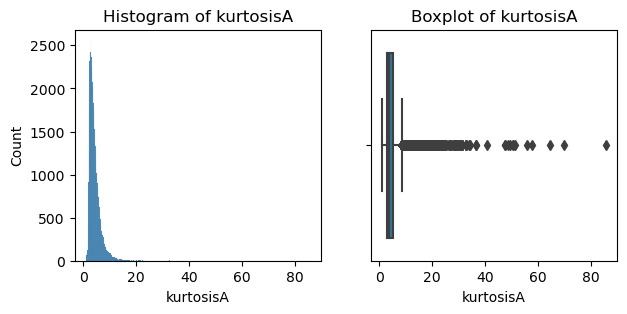

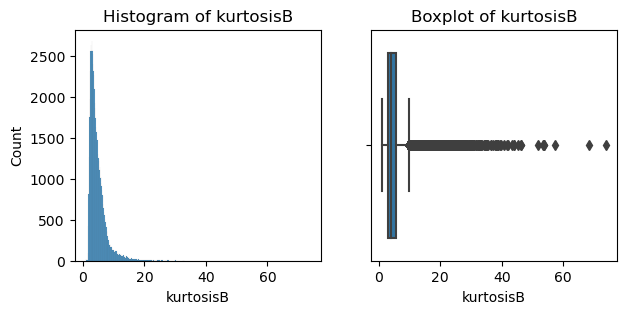

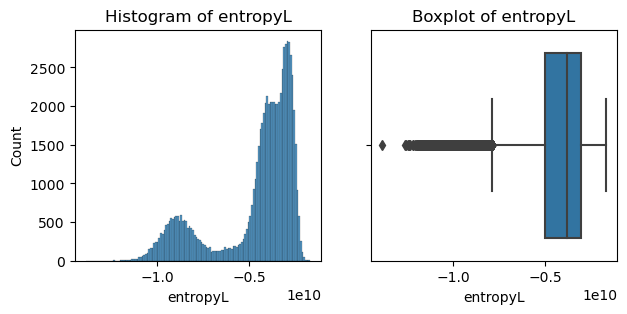

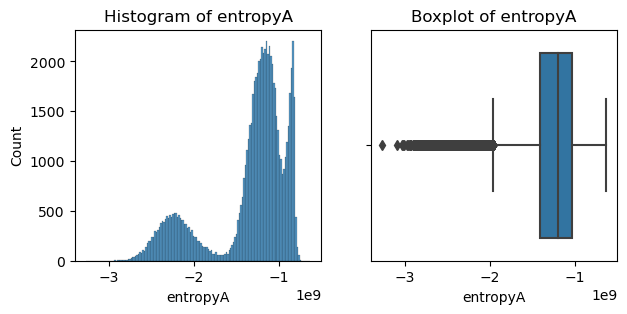

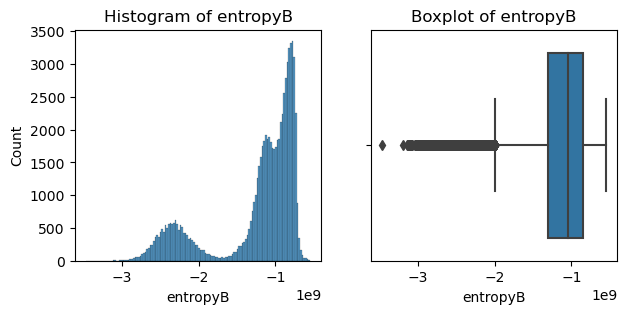

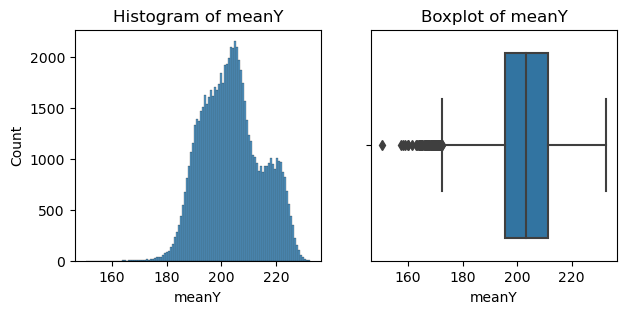

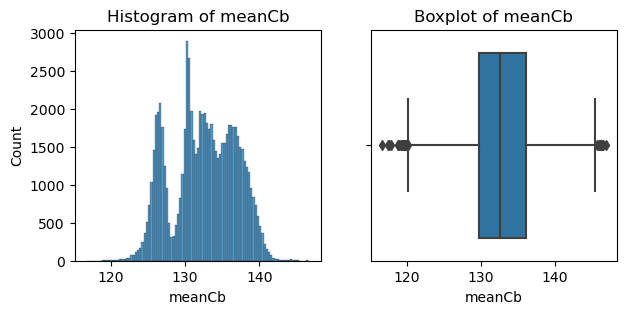

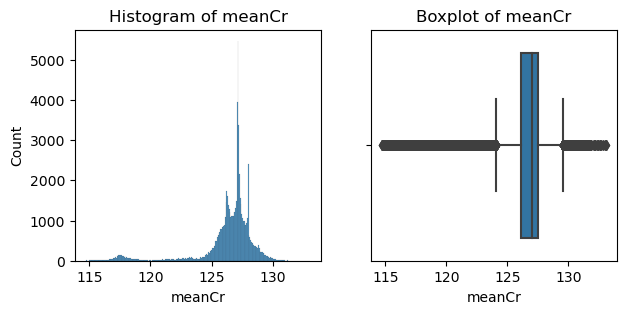

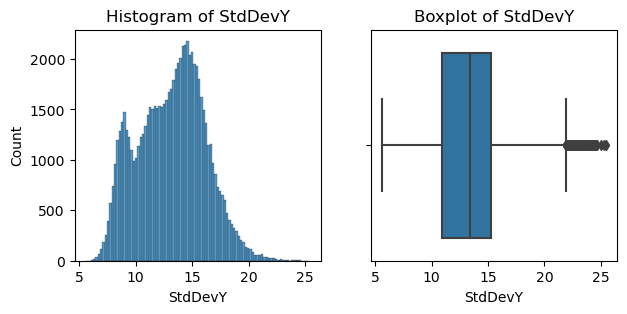

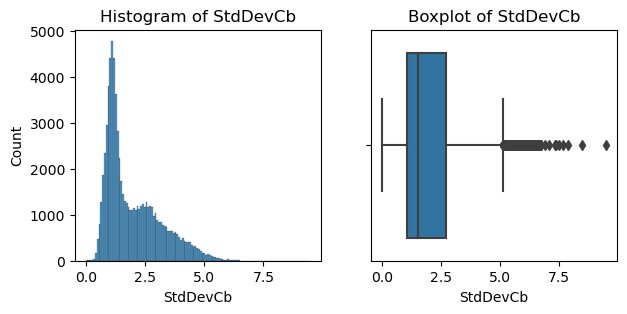

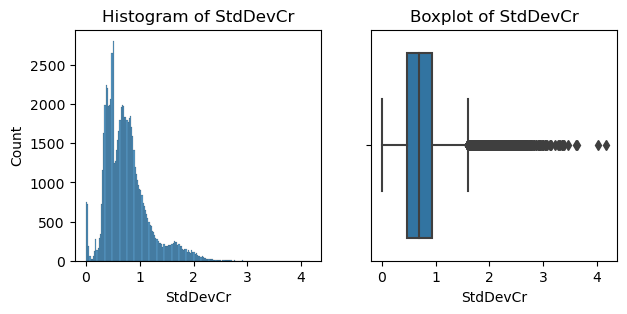

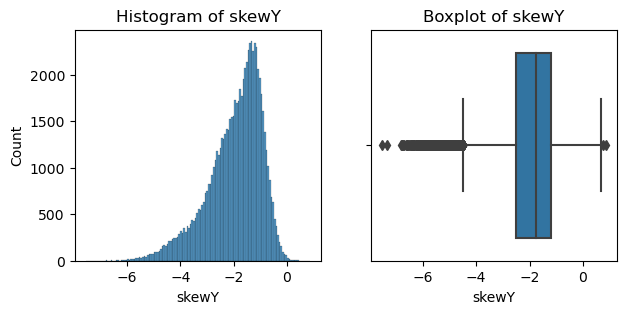

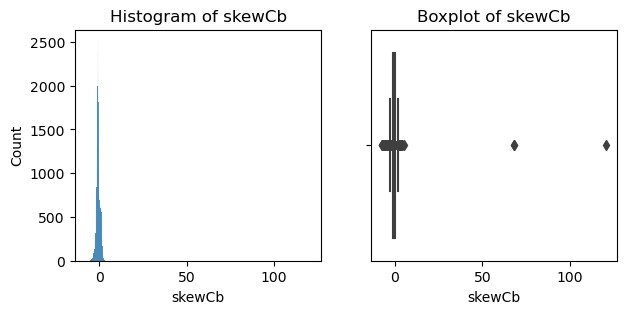

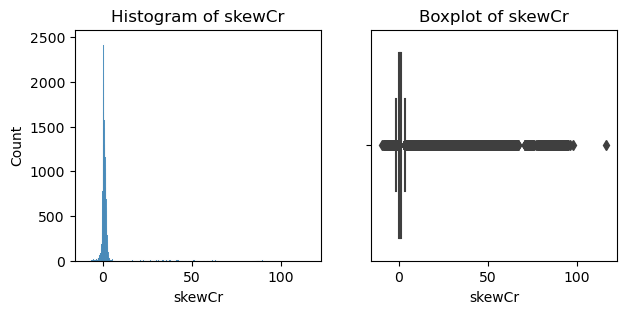

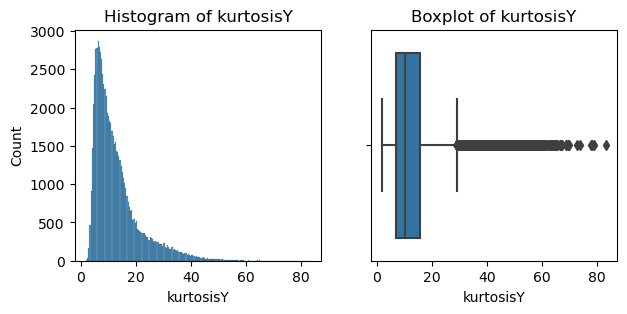

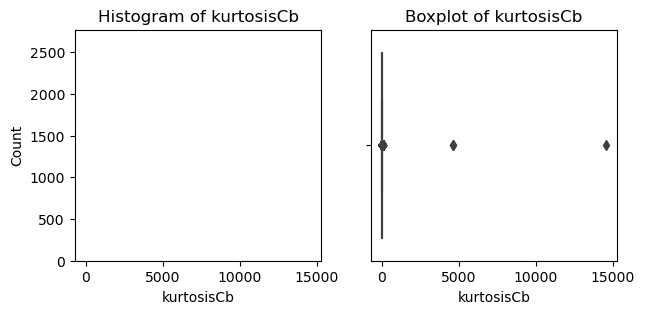

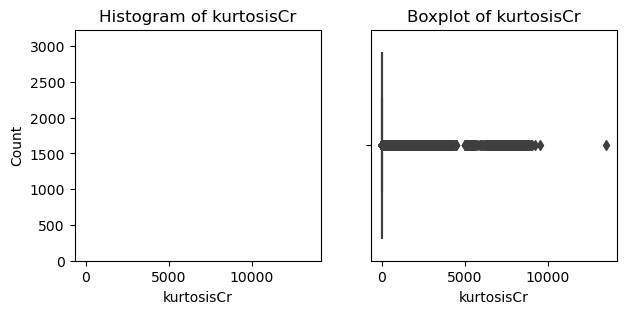

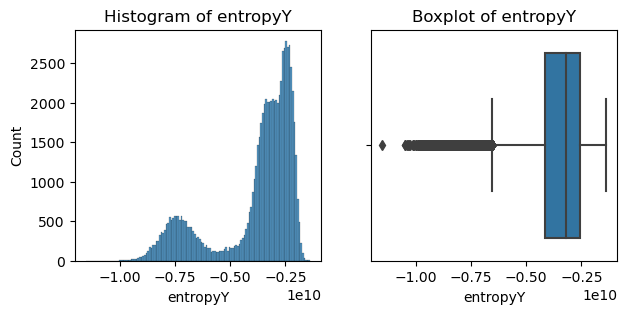

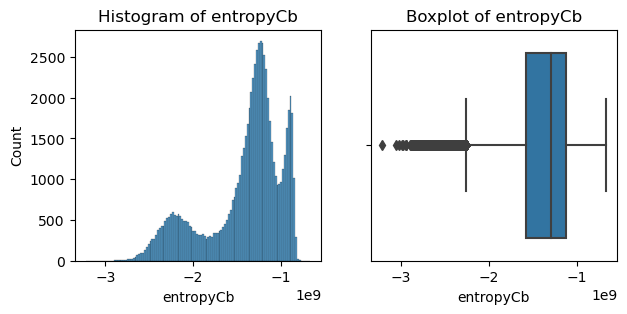

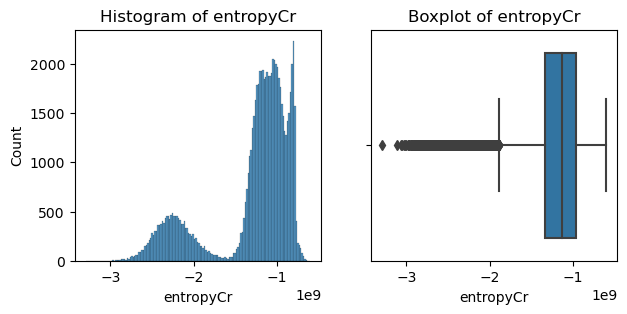

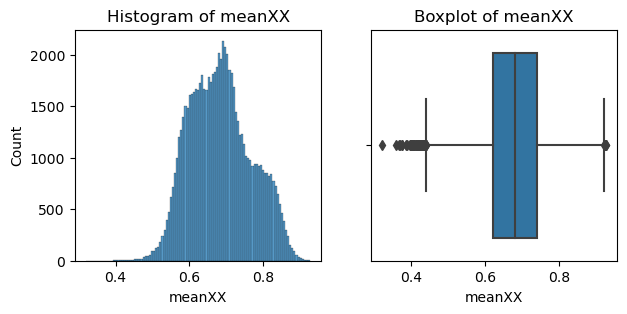

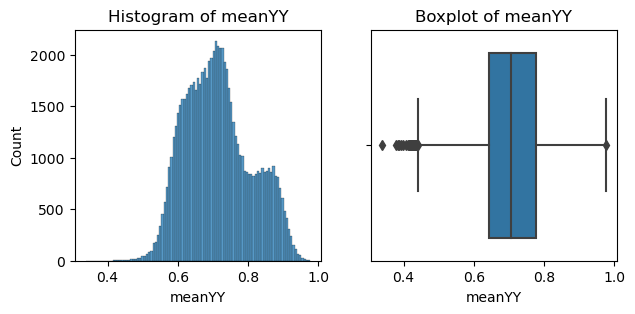

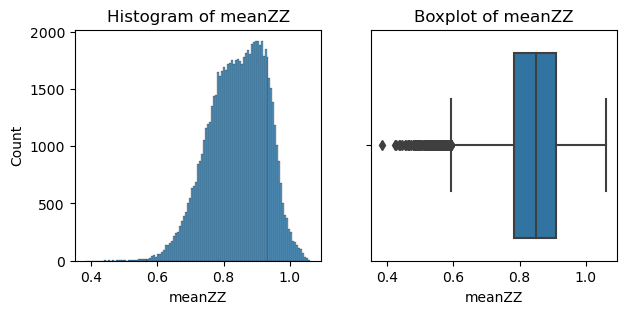

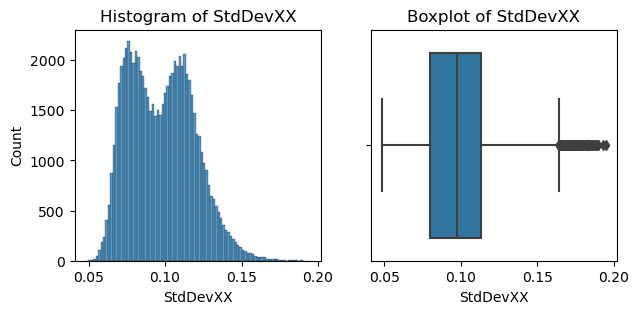

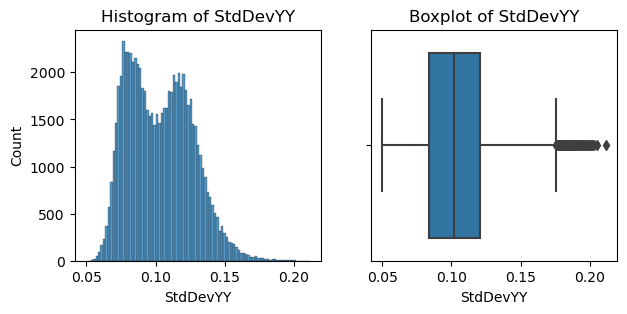

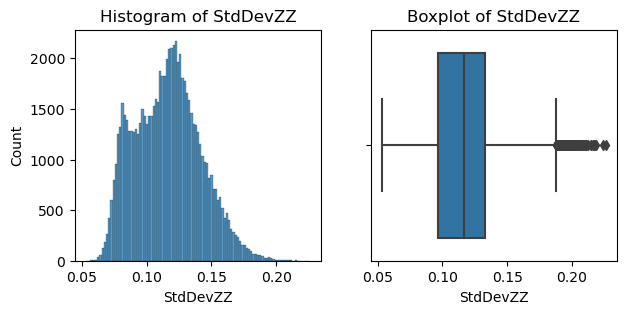

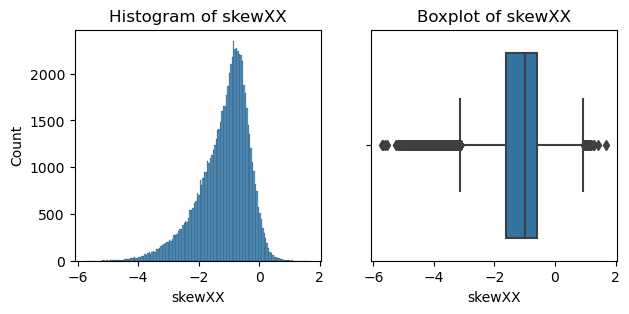

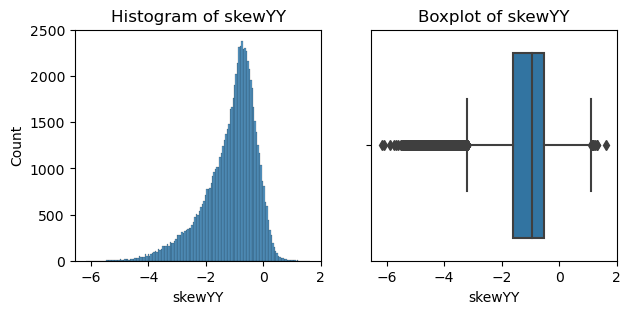

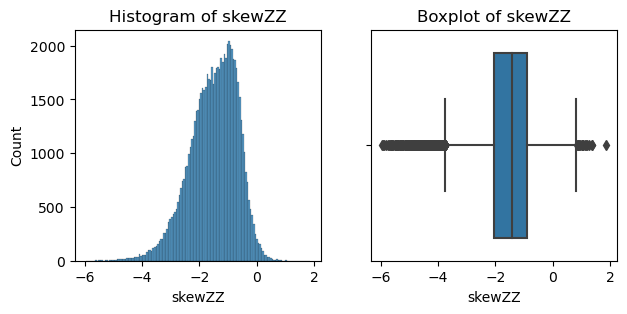

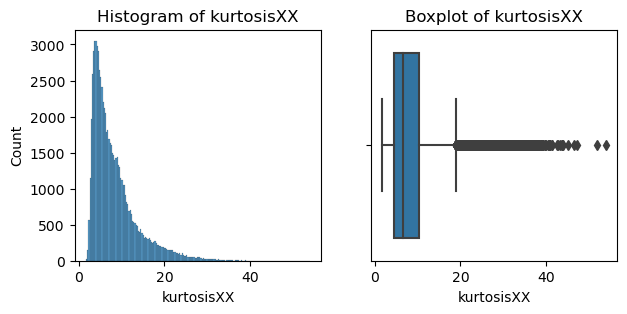

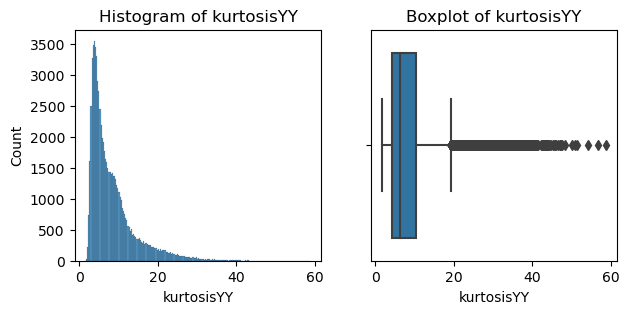

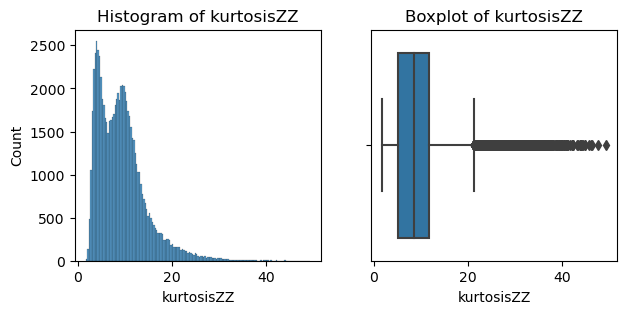

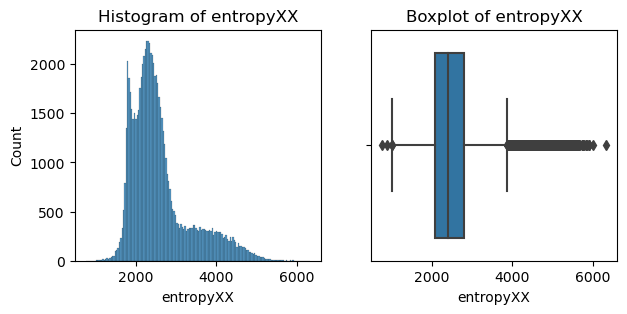

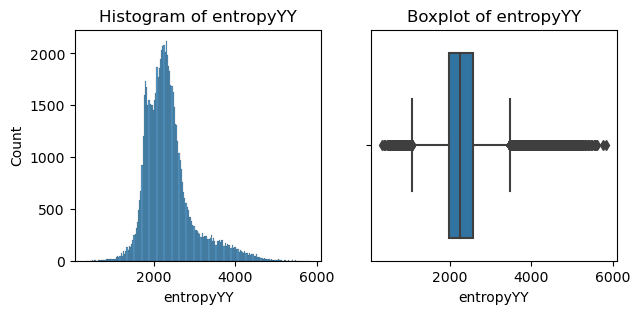

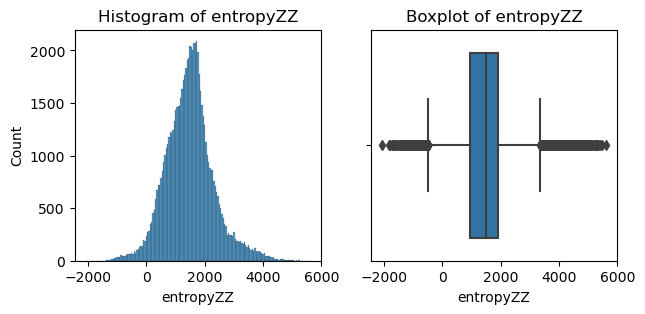

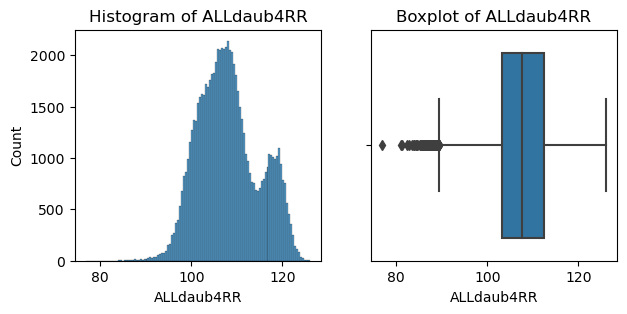

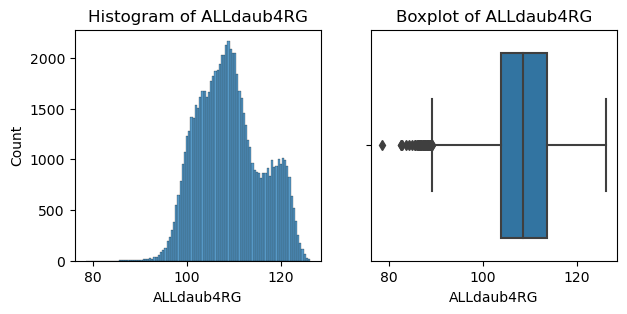

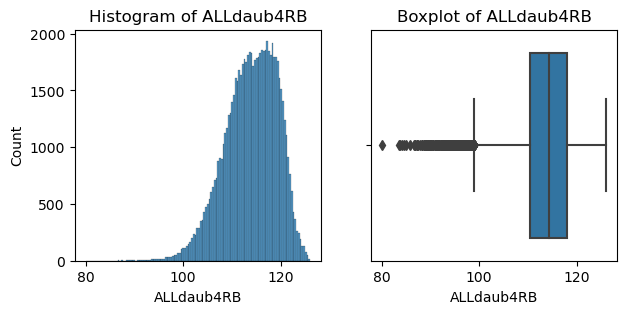

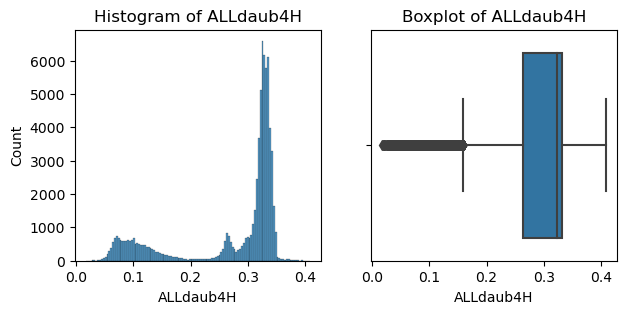

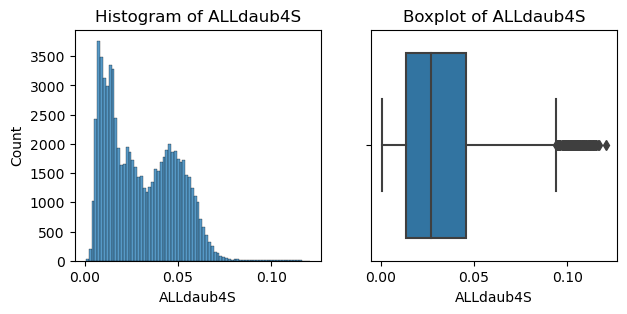

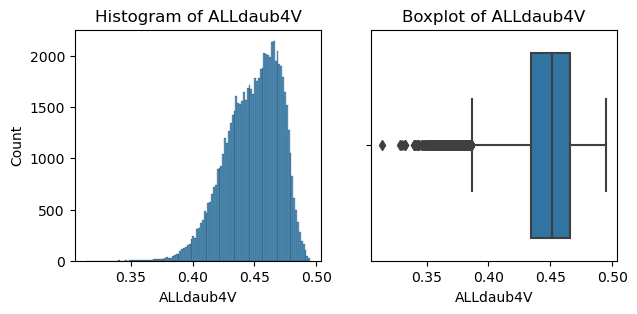

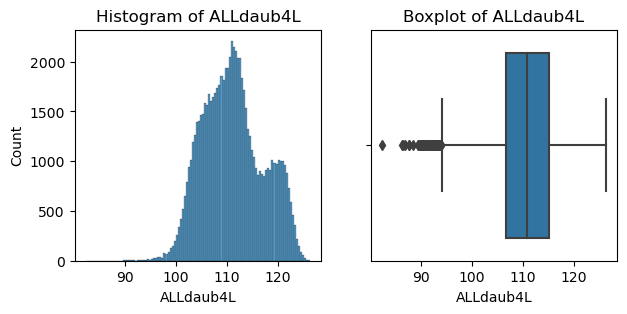

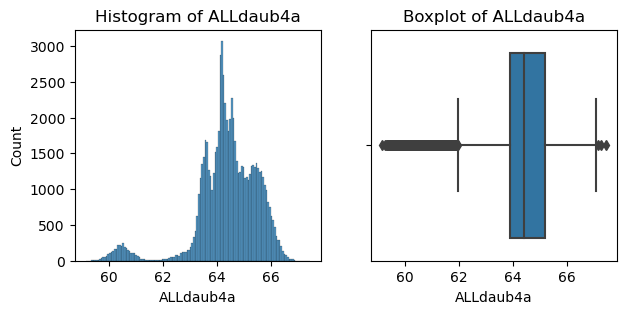

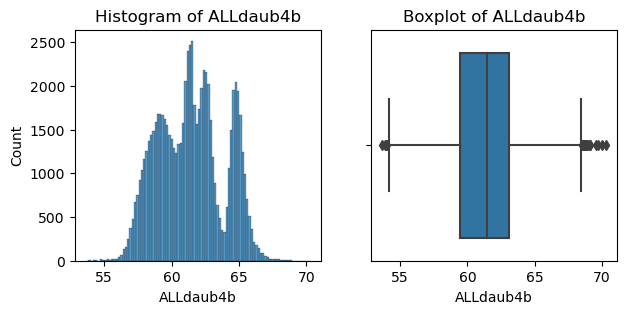

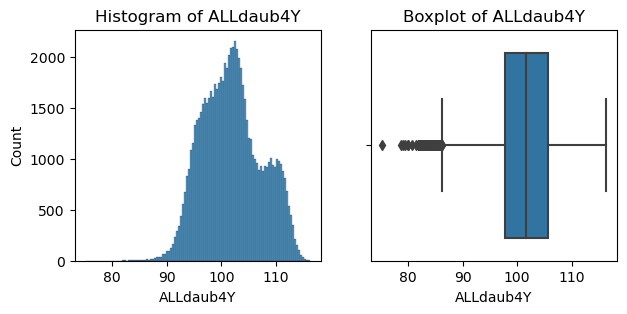

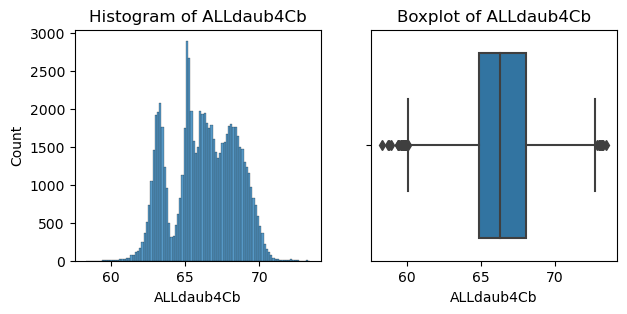

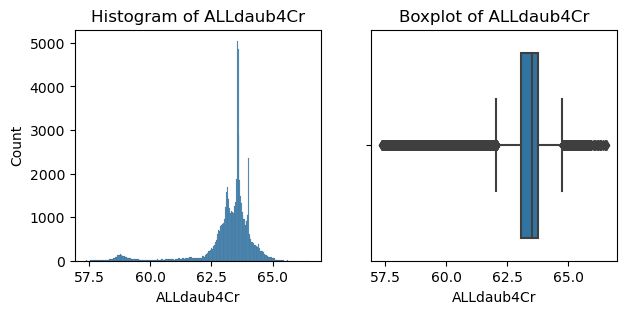

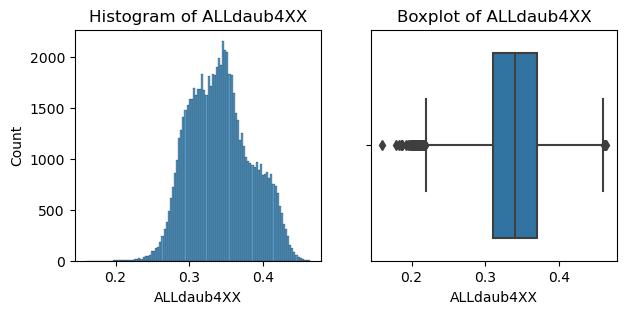

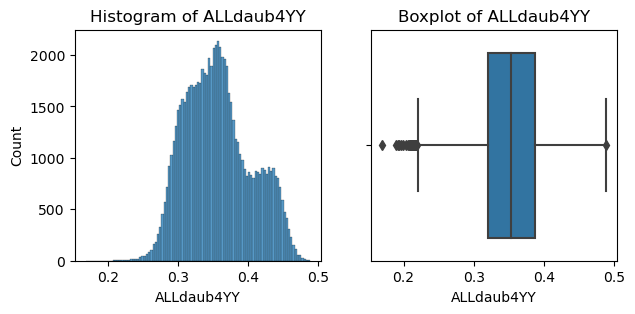

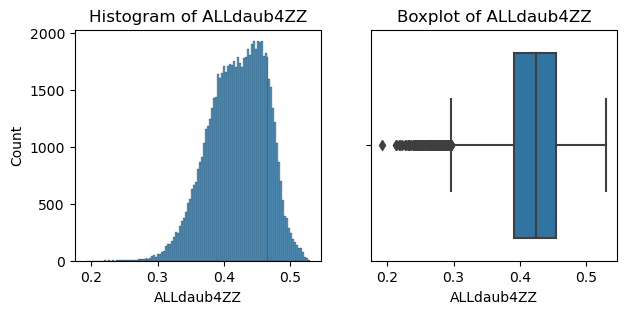

In [11]:
# Plotting histogram and boxplot for each attribute
for col in df.columns[:-1]:
    fig, axs = plt.subplots(ncols=2, figsize=(7, 3))
    sns.histplot(data=df, x=col, ax=axs[0])
    axs[0].set_title(f'Histogram of {col}')
    sns.boxplot(data=df, x=col, ax=axs[1])
    axs[1].set_title(f'Boxplot of {col}')
plt.show()


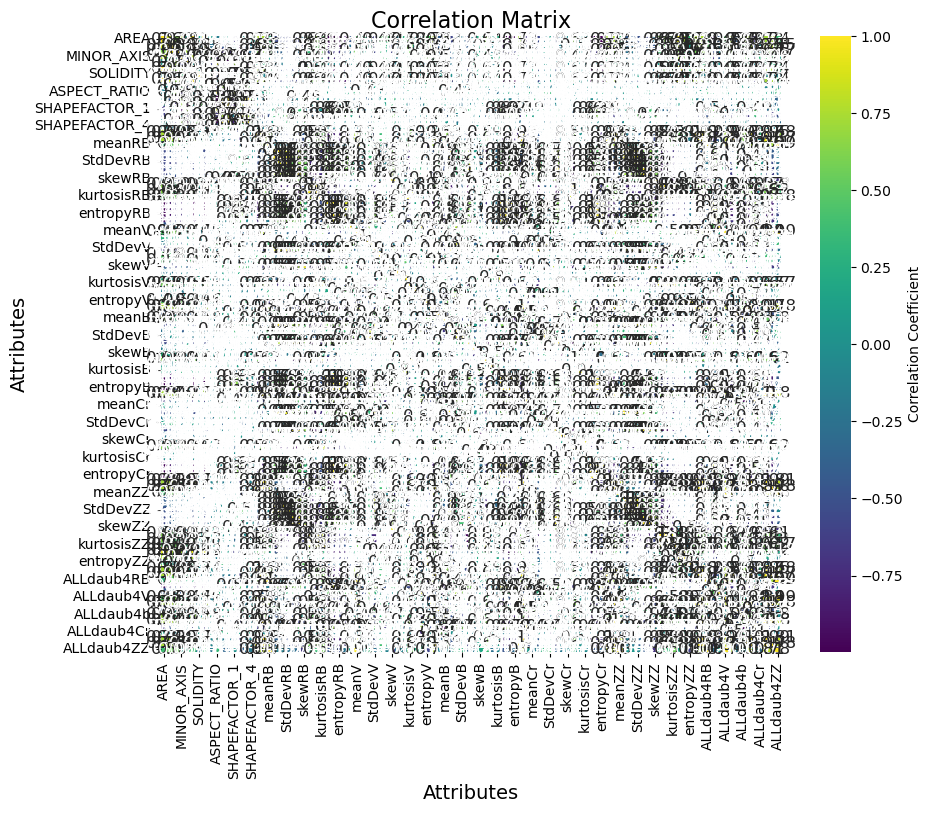

In [12]:
# Creating a heatmap to visualize the correlation between attributes
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(), annot=True, cmap='viridis', annot_kws={'size': 12}, cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix', fontsize=16)
plt.xlabel('Attributes', fontsize=14)
plt.ylabel('Attributes', fontsize=14)


plt.show()



In [13]:
df.describe()

AREA     PERIMETER    MAJOR_AXIS    MINOR_AXIS  ECCENTRICITY  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean    8379.197507    378.169453    161.805540     66.829335      0.886077   
std     3119.209274     70.597008     36.461005     16.689269      0.071906   
min     3929.000000    261.040000     96.968300     34.673000      0.627700   
25%     6259.000000    316.431500    132.623500     49.650200      0.846100   
50%     7345.000000    351.261000    149.343950     69.183900      0.885600   
75%     8901.000000    444.986000    197.462025     75.814125      0.950800   
max    21019.000000    593.698000    255.647200    113.441100      0.986800   

            EQDIASQ      SOLIDITY   CONVEX_AREA        EXTENT  ASPECT_RATIO  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean     101.731251      0.975896   8584.862320      0.633226      2.597063   
std       17.874070      0.007966   3189.298025      0.123795      0.968982   
min       70.728800      0.877500   4032.000000      0.278800      1.284500   
25%       89.270400      0.970900   6385.000000      0.561000      1.876100   
50%       96.705500      0.976400   7532.000000      0.655800      2.153200   
75%      106.457100      0.982200   9153.000000      0.727800      3.228700   
max      163.591600      0.992100  21633.000000      0.901700      6.179500   

       ...     ALLdaub4V     ALLdaub4L     ALLdaub4a     ALLdaub4b  \
count  ...  75000.000000  75000.000000  75000.000000  75000.000000   
mean   ...      0.448960    111.088252     64.379443     61.461457   
std    ...      0.021736      5.904854      1.175616      2.435635   
min    ...      0.313900     82.300600     59.137900     53.653800   
25%    ...      0.434200    106.632900     63.883800     59.465575   
50%    ...      0.451600    110.770700     64.419350     61.424400   
75%    ...      0.466100    115.065075     65.174200     63.076825   
max    ...      0.495100    126.265100     67.459000     70.284000   

          ALLdaub4Y    ALLdaub4Cb    ALLdaub4Cr    ALLdaub4XX    ALLdaub4YY  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean     101.925425     66.240541     63.202088      0.341944      0.357058   
std        5.436861      2.159109      1.174976      0.041921      0.047139   
min       75.191800     58.323800     57.363400      0.159700      0.169000   
25%       97.834400     64.842000     63.052800      0.309900      0.320900   
50%      101.683700     66.291600     63.522050      0.340100      0.353300   
75%      105.592450     68.011800     63.734000      0.370300      0.387900   
max      116.287300     73.424700     66.539100      0.463900      0.488600   

         ALLdaub4ZZ  
count  75000.000000  
mean       0.421176  
std        0.043137  
min        0.191800  
25%        0.391200  
50%        0.424200  
75%        0.454700  
max        0.530200  

[8 rows x 106 columns]

In [11]:
heatmap_data = pd.pivot_table(df, index=['CLASS'])
                             
heatmap_data.head()

ALLdaub4Cb  ALLdaub4Cr  ALLdaub4H   ALLdaub4L  ALLdaub4RB  \
CLASS                                                                  
Arborio     65.264920   63.698151   0.309169  108.970089  109.654343   
Basmati     68.016905   62.882757   0.319044  111.865398  118.539193   
Ipsala      63.075733   63.998548   0.100326  119.272266  116.233661   
Jasmine     66.430099   62.223725   0.311114  109.593535  112.473944   
Karacadag   68.415049   63.207258   0.329571  105.739970  112.780144   

           ALLdaub4RG  ALLdaub4RR  ALLdaub4S  ALLdaub4V  ALLdaub4XX  ...  \
CLASS                                                                ...   
Arborio    106.708531  106.635089   0.015643   0.430382    0.325759  ...   
Basmati    109.676694  108.704901   0.043112   0.465120    0.350610  ...   
Ipsala     118.450435  118.118879   0.010974   0.465533    0.399418  ...   
Jasmine    107.917472  104.755573   0.034417   0.441202    0.326010  ...   
Karacadag  102.657314  102.679325   0.047209   0.442562    0.307923  ...   

              skewL    skewRB    skewRG    skewRR     skewS     skewV  \
CLASS                                                                   
Arborio   -1.354054 -1.405469 -1.248192 -1.261860  0.851712 -1.403147   
Basmati   -1.407351 -3.054337 -1.175554 -1.084780 -0.434896 -3.051956   
Ipsala    -3.481283 -2.797885 -3.412901 -3.014840  0.915184 -3.436129   
Jasmine   -2.370448 -2.610134 -2.234494 -1.914416 -0.435326 -2.614324   
Karacadag -1.806024 -1.932578 -1.621138 -1.616849 -0.799482 -1.941076   

             skewXX     skewY    skewYY    skewZZ  
CLASS                                              
Arborio   -0.773081 -1.271824 -0.753190 -0.860473  
Basmati   -0.721570 -1.354637 -0.541017 -2.029990  
Ipsala    -2.089732 -3.246921 -2.224949 -1.814104  
Jasmine   -1.297192 -2.217747 -1.297443 -1.689668  
Karacadag -0.906823 -1.686369 -0.839371 -1.125843  

[5 rows x 106 columns]

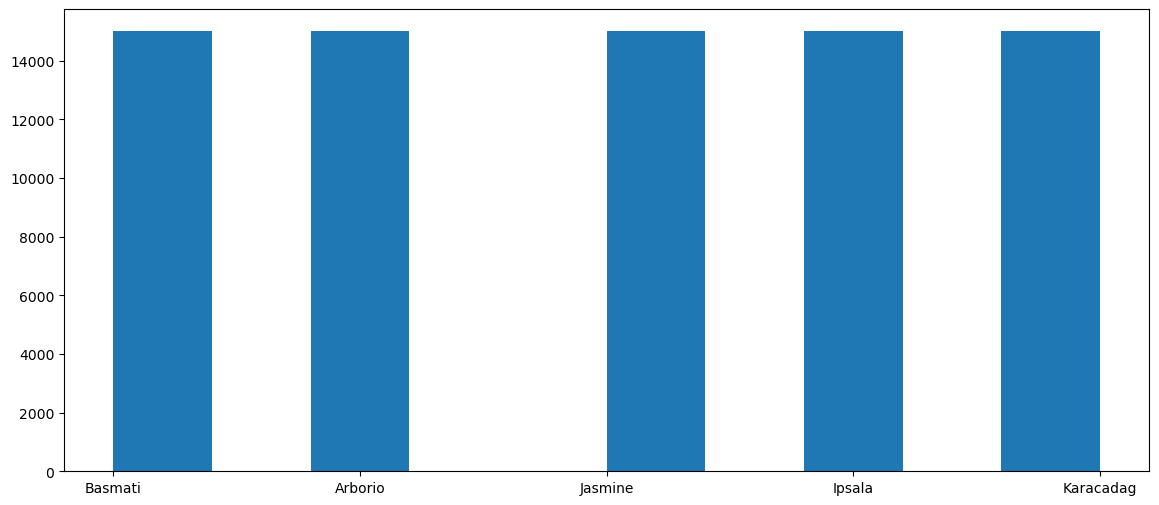

In [12]:
plt.figure(figsize=(14,6))
plt.hist(df['CLASS'])
plt.show()

In [16]:
df

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0       7805    437.915    209.8215     48.0221        0.9735   99.6877   
1       7503    340.757    138.3361     69.8417        0.8632   97.7400   
2       5124    314.617    141.9803     46.5784        0.9447   80.7718   
3       7990    437.085    201.4386     51.2245        0.9671  100.8622   
4       7433    342.893    140.3350     68.3927        0.8732   97.2830   
...      ...        ...         ...         ...           ...       ...   
74995   5551    285.911    114.1695     62.9079        0.8345   84.0699   
74996   7696    322.703    121.3900     81.1375        0.7438   98.9892   
74997   7579    339.295    136.3125     71.2866        0.8524   98.2338   
74998  15174    489.502    200.9486     97.6282        0.8740  138.9969   
74999  12931    452.635    185.5138     90.2651        0.8736  128.3131   

       SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  ALLdaub4L  ALLdaub4a  \
0        0.9775         7985  0.3547        4.3693  ...   113.9924    65.0610   
1        0.9660         7767  0.6637        1.9807  ...   105.7055    64.3685   
2        0.9721         5271  0.4760        3.0482  ...   109.7155    62.6423   
3        0.9659         8272  0.6274        3.9325  ...   116.5405    64.9069   
4        0.9831         7561  0.6006        2.0519  ...   107.7502    64.7071   
...         ...          ...     ...           ...  ...        ...        ...   
74995    0.9846         5638  0.6418        1.8149  ...   103.9529    64.9225   
74996    0.9868         7799  0.7309        1.4961  ...   108.9778    65.4571   
74997    0.9805         7730  0.6399        1.9122  ...   106.0881    64.1869   
74998    0.9766        15537  0.7903        2.0583  ...   119.2037    63.3545   
74999    0.9760        13249  0.7640        2.0552  ...   121.4198    63.5424   

       ALLdaub4b  ALLdaub4Y  ALLdaub4Cb  ALLdaub4Cr  ALLdaub4XX  ALLdaub4YY  \
0        59.5989   104.8552     67.8779     63.0828      0.3673      0.3793   
1        62.2084    96.8375     65.5371     63.5832      0.3014      0.3144   
2        58.7439   100.2352     68.9753     59.8342      0.3233      0.3445   
3        60.2562   107.2560     67.3298     63.2237      0.3880      0.4020   
4        61.3549    98.8704     66.2048     63.5378      0.3184      0.3303   
...          ...        ...         ...         ...         ...         ...   
74995    62.4355    95.2780     65.5114     64.4457      0.2895      0.2997   
74996    59.9502   100.2301     67.5089     63.6028      0.3335      0.3426   
74997    61.3876    97.1585     66.2445     63.0596      0.3028      0.3164   
74998    64.8200   109.3027     63.3122     63.5967      0.3970      0.4215   
74999    65.2355   111.4580     63.0129     63.9117      0.4162      0.4414   

       ALLdaub4ZZ      CLASS  
0          0.4733    Basmati  
1          0.3641    Arborio  
2          0.4448    Jasmine  
3          0.4904    Basmati  
4          0.3928    Arborio  
...           ...        ...  
74995      0.3455    Arborio  
74996      0.4257  Karacadag  
74997      0.3761    Arborio  
74998      0.4469     Ipsala  
74999      0.4626     Ipsala  

[75000 rows x 107 columns]

F-Test

In [13]:
df_f_test=df

In [14]:
df.CLASS.unique()

array(['Basmati', 'Arborio', 'Jasmine', 'Ipsala', 'Karacadag'],
      dtype=object)

In [15]:
def f_test(df_f_test,arr):  
    df_anova = df_f_test[[arr,'CLASS']]
    grps = pd.unique(df_anova.CLASS.values)
    grps
    d_data = {grp:df_anova[arr][df_anova.CLASS == grp] for grp in grps}
    F, p = stats.f_oneway(d_data['Basmati'], d_data['Arborio'], d_data['Jasmine'], d_data['Ipsala'], d_data['Karacadag'])
    print("p_values:-",p)
    if p<0.05:
        print("reject null hypothesis")
    else:
        print("accept null hypothesis")
        
    return 

In [16]:
f_test(df_f_test,"MINOR_AXIS")

p_values:- 0.0
reject null hypothesis


In [17]:
f_test(df_f_test,"ALLdaub4Cb")

p_values:- 0.0
reject null hypothesis


In [18]:
import scipy.stats as stats

def one_way_anova(df_f_test, independent_variable, dependent_variable):
    
    # Group the data by the dependent variable
    groups = df_f_test.groupby(dependent_variable)

    # Get the independent variable for each group
    group_data = [group[independent_variable] for name, group in groups]

    # Perform one-way ANOVA test
    f_value, p_value = stats.f_oneway(*group_data)

    return f_value, p_value


In [19]:
one_way_anova(df_f_test,"ASPECT_RATIO","CLASS")

(291931.55132356053, 0.0)

In [20]:
df.dtypes

AREA              int64
PERIMETER       float64
MAJOR_AXIS      float64
MINOR_AXIS      float64
ECCENTRICITY    float64
                 ...   
ALLdaub4Cr      float64
ALLdaub4XX      float64
ALLdaub4YY      float64
ALLdaub4ZZ      float64
CLASS            object
Length: 107, dtype: object

In [21]:
df.loc[df['CLASS'] == "Karacadag", 'AREA'].mean()

6484.379466666666

In [22]:
from scipy.stats import chi2_contingency

# create contingency table
cont_table = pd.crosstab(df['EXTENT'], df['CLASS'])

# perform chi-squared test of independence
chi2, p, dof, expected = chi2_contingency(cont_table)

# print results
print('Chi-squared statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p)

if p < 0.05:
    print('There is a significant association between the variables.')
else:
    print('There is no significant association between the variables.')

Chi-squared statistic: 91556.62346858226
Degrees of freedom: 21852
p-value: 0.0
There is a significant association between the variables.


In [27]:
df

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0       7805    437.915    209.8215     48.0221        0.9735   99.6877   
1       7503    340.757    138.3361     69.8417        0.8632   97.7400   
2       5124    314.617    141.9803     46.5784        0.9447   80.7718   
3       7990    437.085    201.4386     51.2245        0.9671  100.8622   
4       7433    342.893    140.3350     68.3927        0.8732   97.2830   
...      ...        ...         ...         ...           ...       ...   
74995   5551    285.911    114.1695     62.9079        0.8345   84.0699   
74996   7696    322.703    121.3900     81.1375        0.7438   98.9892   
74997   7579    339.295    136.3125     71.2866        0.8524   98.2338   
74998  15174    489.502    200.9486     97.6282        0.8740  138.9969   
74999  12931    452.635    185.5138     90.2651        0.8736  128.3131   

       SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  ALLdaub4L  ALLdaub4a  \
0        0.9775         7985  0.3547        4.3693  ...   113.9924    65.0610   
1        0.9660         7767  0.6637        1.9807  ...   105.7055    64.3685   
2        0.9721         5271  0.4760        3.0482  ...   109.7155    62.6423   
3        0.9659         8272  0.6274        3.9325  ...   116.5405    64.9069   
4        0.9831         7561  0.6006        2.0519  ...   107.7502    64.7071   
...         ...          ...     ...           ...  ...        ...        ...   
74995    0.9846         5638  0.6418        1.8149  ...   103.9529    64.9225   
74996    0.9868         7799  0.7309        1.4961  ...   108.9778    65.4571   
74997    0.9805         7730  0.6399        1.9122  ...   106.0881    64.1869   
74998    0.9766        15537  0.7903        2.0583  ...   119.2037    63.3545   
74999    0.9760        13249  0.7640        2.0552  ...   121.4198    63.5424   

       ALLdaub4b  ALLdaub4Y  ALLdaub4Cb  ALLdaub4Cr  ALLdaub4XX  ALLdaub4YY  \
0        59.5989   104.8552     67.8779     63.0828      0.3673      0.3793   
1        62.2084    96.8375     65.5371     63.5832      0.3014      0.3144   
2        58.7439   100.2352     68.9753     59.8342      0.3233      0.3445   
3        60.2562   107.2560     67.3298     63.2237      0.3880      0.4020   
4        61.3549    98.8704     66.2048     63.5378      0.3184      0.3303   
...          ...        ...         ...         ...         ...         ...   
74995    62.4355    95.2780     65.5114     64.4457      0.2895      0.2997   
74996    59.9502   100.2301     67.5089     63.6028      0.3335      0.3426   
74997    61.3876    97.1585     66.2445     63.0596      0.3028      0.3164   
74998    64.8200   109.3027     63.3122     63.5967      0.3970      0.4215   
74999    65.2355   111.4580     63.0129     63.9117      0.4162      0.4414   

       ALLdaub4ZZ      CLASS  
0          0.4733    Basmati  
1          0.3641    Arborio  
2          0.4448    Jasmine  
3          0.4904    Basmati  
4          0.3928    Arborio  
...           ...        ...  
74995      0.3455    Arborio  
74996      0.4257  Karacadag  
74997      0.3761    Arborio  
74998      0.4469     Ipsala  
74999      0.4626     Ipsala  

[75000 rows x 107 columns]

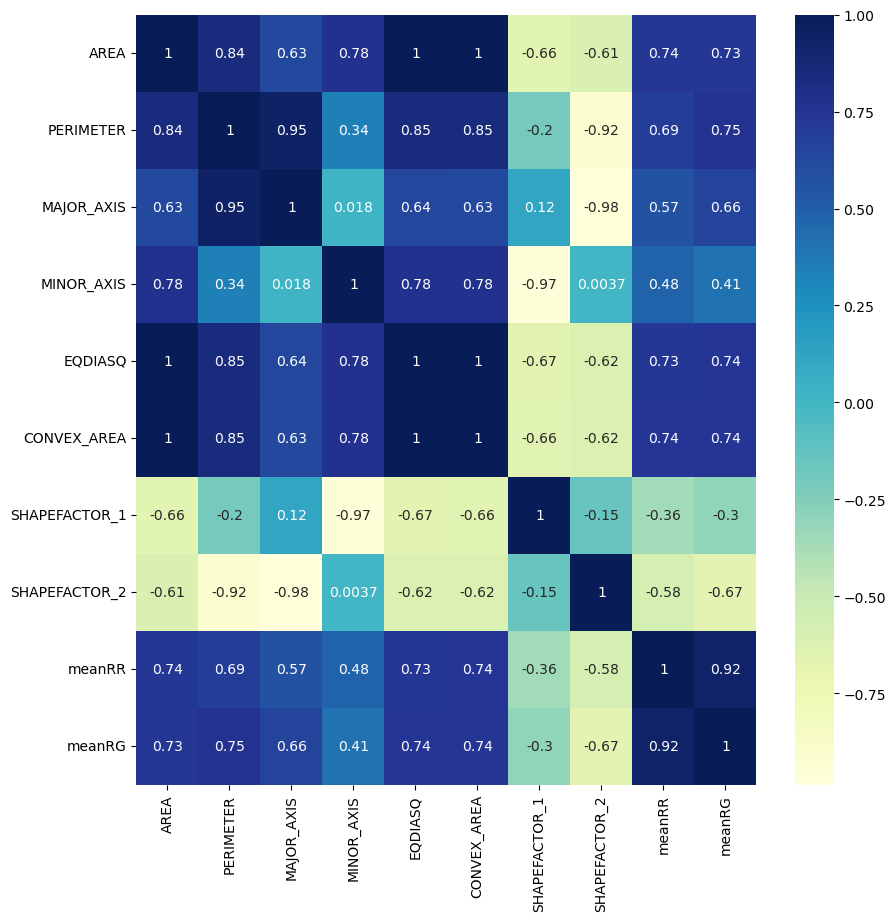

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Get the top N most highly correlated features
N = 10
top_corr_features = corr.index[abs(corr["AREA"]) >= 0.5][:N]

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="YlGnBu")
plt.show()

In [29]:
df

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0       7805    437.915    209.8215     48.0221        0.9735   99.6877   
1       7503    340.757    138.3361     69.8417        0.8632   97.7400   
2       5124    314.617    141.9803     46.5784        0.9447   80.7718   
3       7990    437.085    201.4386     51.2245        0.9671  100.8622   
4       7433    342.893    140.3350     68.3927        0.8732   97.2830   
...      ...        ...         ...         ...           ...       ...   
74995   5551    285.911    114.1695     62.9079        0.8345   84.0699   
74996   7696    322.703    121.3900     81.1375        0.7438   98.9892   
74997   7579    339.295    136.3125     71.2866        0.8524   98.2338   
74998  15174    489.502    200.9486     97.6282        0.8740  138.9969   
74999  12931    452.635    185.5138     90.2651        0.8736  128.3131   

       SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  ALLdaub4L  ALLdaub4a  \
0        0.9775         7985  0.3547        4.3693  ...   113.9924    65.0610   
1        0.9660         7767  0.6637        1.9807  ...   105.7055    64.3685   
2        0.9721         5271  0.4760        3.0482  ...   109.7155    62.6423   
3        0.9659         8272  0.6274        3.9325  ...   116.5405    64.9069   
4        0.9831         7561  0.6006        2.0519  ...   107.7502    64.7071   
...         ...          ...     ...           ...  ...        ...        ...   
74995    0.9846         5638  0.6418        1.8149  ...   103.9529    64.9225   
74996    0.9868         7799  0.7309        1.4961  ...   108.9778    65.4571   
74997    0.9805         7730  0.6399        1.9122  ...   106.0881    64.1869   
74998    0.9766        15537  0.7903        2.0583  ...   119.2037    63.3545   
74999    0.9760        13249  0.7640        2.0552  ...   121.4198    63.5424   

       ALLdaub4b  ALLdaub4Y  ALLdaub4Cb  ALLdaub4Cr  ALLdaub4XX  ALLdaub4YY  \
0        59.5989   104.8552     67.8779     63.0828      0.3673      0.3793   
1        62.2084    96.8375     65.5371     63.5832      0.3014      0.3144   
2        58.7439   100.2352     68.9753     59.8342      0.3233      0.3445   
3        60.2562   107.2560     67.3298     63.2237      0.3880      0.4020   
4        61.3549    98.8704     66.2048     63.5378      0.3184      0.3303   
...          ...        ...         ...         ...         ...         ...   
74995    62.4355    95.2780     65.5114     64.4457      0.2895      0.2997   
74996    59.9502   100.2301     67.5089     63.6028      0.3335      0.3426   
74997    61.3876    97.1585     66.2445     63.0596      0.3028      0.3164   
74998    64.8200   109.3027     63.3122     63.5967      0.3970      0.4215   
74999    65.2355   111.4580     63.0129     63.9117      0.4162      0.4414   

       ALLdaub4ZZ      CLASS  
0          0.4733    Basmati  
1          0.3641    Arborio  
2          0.4448    Jasmine  
3          0.4904    Basmati  
4          0.3928    Arborio  
...           ...        ...  
74995      0.3455    Arborio  
74996      0.4257  Karacadag  
74997      0.3761    Arborio  
74998      0.4469     Ipsala  
74999      0.4626     Ipsala  

[75000 rows x 107 columns]

Dimensionality Reduction

    Each sample has expression values for 75 variables. However, it may not be necessary to include all values to analyze each rice type. Therefore, we will identify a smaller set of attributes which will then be used to fit multiclass classification models. So, the first task targets the dimensionality reduction using various techniques such as, PCA, LDA, and t-SNE

Dimensionality Reduction using PCA


In [4]:
# Define data 
df_pca = df.drop(['CLASS'], axis=1)
df_pca.head()

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0  7805    437.915    209.8215     48.0221        0.9735   99.6877    0.9775   
1  7503    340.757    138.3361     69.8417        0.8632   97.7400    0.9660   
2  5124    314.617    141.9803     46.5784        0.9447   80.7718    0.9721   
3  7990    437.085    201.4386     51.2245        0.9671  100.8622    0.9659   
4  7433    342.893    140.3350     68.3927        0.8732   97.2830    0.9831   

   CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  ALLdaub4V  ALLdaub4L  ALLdaub4a  \
0         7985  0.3547        4.3693  ...     0.4733   113.9924    65.0610   
1         7767  0.6637        1.9807  ...     0.4182   105.7055    64.3685   
2         5271  0.4760        3.0482  ...     0.4606   109.7155    62.6423   
3         8272  0.6274        3.9325  ...     0.4797   116.5405    64.9069   
4         7561  0.6006        2.0519  ...     0.4332   107.7502    64.7071   

   ALLdaub4b  ALLdaub4Y  ALLdaub4Cb  ALLdaub4Cr  ALLdaub4XX  ALLdaub4YY  \
0    59.5989   104.8552     67.8779     63.0828      0.3673      0.3793   
1    62.2084    96.8375     65.5371     63.5832      0.3014      0.3144   
2    58.7439   100.2352     68.9753     59.8342      0.3233      0.3445   
3    60.2562   107.2560     67.3298     63.2237      0.3880      0.4020   
4    61.3549    98.8704     66.2048     63.5378      0.3184      0.3303   

   ALLdaub4ZZ  
0      0.4733  
1      0.3641  
2      0.4448  
3      0.4904  
4      0.3928  

[5 rows x 106 columns]

In [5]:
df_pca.values.shape

(75000, 106)

In [6]:
x_pca = df_pca.values

Scaling the data using standard scaler method

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(x_pca)
X_Scaled

array([[-0.18408554,  0.84629572,  1.31692147, ...,  0.60485415,
         0.47182932,  1.20834304],
       [-0.2809056 , -0.52994742, -0.64369033, ..., -0.96716522,
        -0.90494576, -1.32313361],
       [-1.04360398, -0.90022054, -0.54374178, ..., -0.44474907,
        -0.26641063,  0.54765546],
       ...,
       [-0.25654029, -0.55065665, -0.69919109, ..., -0.93376876,
        -0.86251818, -1.04494936],
       [ 2.17838792,  1.57702562,  1.07356671, ...,  1.31333633,
         1.36705133,  0.5963377 ],
       [ 1.45929062,  1.05480454,  0.65024039, ...,  1.77134501,
         1.78920579,  0.96029542]])

In [8]:
X_Scaled = np.nan_to_num(X_Scaled, nan=0)

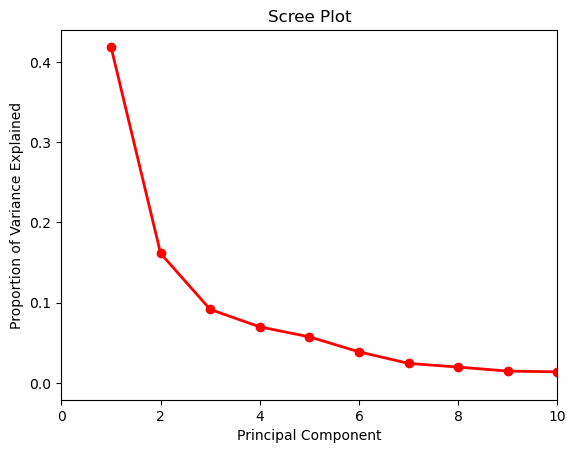

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA with all components
pca = PCA()
pca.fit(X_Scaled)

# Plot the scree plot
plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.xlim(0, 10)
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [10]:
# Import PCA from sklearn and define the n_components as 2 
from sklearn.decomposition import PCA
pca_with_2=PCA(n_components=2)

In [11]:
#Perform fit transform on the scaled data
X_pca_with_2 = pca_with_2.fit_transform(X_Scaled)
X_pca_with_2.shape

(75000, 2)

In [12]:
X_pca_with_2

array([[-0.14942593, -7.41251473],
       [-5.95562732,  4.46320898],
       [-2.40970726, -4.93718103],
       ...,
       [-4.42450439,  4.17597712],
       [12.92657881,  2.09451112],
       [16.85506572,  0.70193675]])

In [13]:
# Put the data back on the 2 columns defined 
df_pca = pd.DataFrame(X_pca_with_2)
df_pca.columns = ['pca1','pca2']

# Add the convereted categorical data for 
df_pca['rice_type']=df['CLASS']
df_pca

pca1      pca2  rice_type
0      -0.149426 -7.412515    Basmati
1      -5.955627  4.463209    Arborio
2      -2.409707 -4.937181    Jasmine
3       0.736098 -7.606457    Basmati
4      -5.427640  2.871019    Arborio
...          ...       ...        ...
74995  -6.796396  6.129392    Arborio
74996  -6.337261  1.089130  Karacadag
74997  -4.424504  4.175977    Arborio
74998  12.926579  2.094511     Ipsala
74999  16.855066  0.701937     Ipsala

[75000 rows x 3 columns]

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

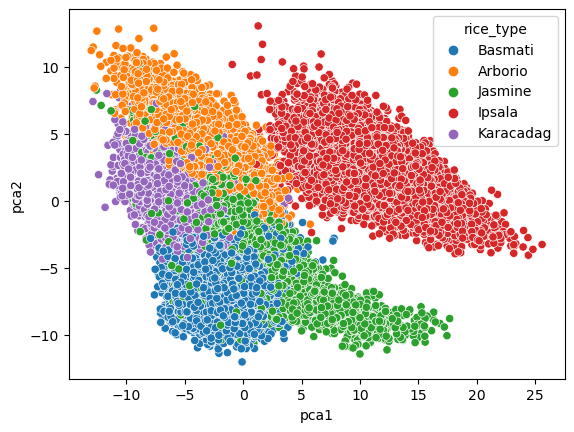

In [14]:
# Present the data on the 5 clusters using seaborn maps 
sns.scatterplot(x='pca1',y='pca2', hue = 'rice_type',data=df_pca)

PCA with n_components=.995

In [15]:
x_pca1 = np.nan_to_num(x_pca, nan=0)

In [16]:
pca_with_995=PCA(.995)
X_pca_with_995 = pca_with_995.fit_transform(x_pca1)
X_pca_with_995.shape
X_pca_with_995

array([[-3.28916871e+08, -3.52099362e+08],
       [-2.28117821e+09,  2.29430348e+08],
       [-4.36496130e+09, -1.73464711e+08],
       ...,
       [-2.14928037e+09,  8.22937189e+07],
       [ 1.03239572e+10,  2.44148540e+07],
       [ 7.99503443e+09,  1.93465493e+08]])

In [17]:
df_pca_995 = pd.DataFrame(X_pca_with_995)
df_pca_995['rice_type']=df['CLASS']
df_pca_995

0             1  rice_type
0     -3.289169e+08 -3.520994e+08    Basmati
1     -2.281178e+09  2.294303e+08    Arborio
2     -4.364961e+09 -1.734647e+08    Jasmine
3      3.912595e+08 -3.312063e+08    Basmati
4     -1.969577e+09  9.051792e+07    Arborio
...             ...           ...        ...
74995 -4.578695e+09  4.188584e+08    Arborio
74996 -1.302148e+09 -1.507964e+08  Karacadag
74997 -2.149280e+09  8.229372e+07    Arborio
74998  1.032396e+10  2.441485e+07     Ipsala
74999  7.995034e+09  1.934655e+08     Ipsala

[75000 rows x 3 columns]

<AxesSubplot:xlabel='0', ylabel='1'>

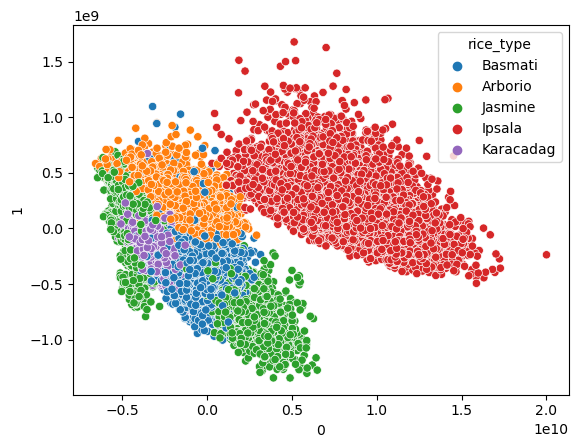

In [18]:
sns.scatterplot(x=0,y=1,hue = 'rice_type', data=df_pca_995)

Dimensionality reduction using t-SNE

In [39]:
df_tsne_data = df
df_tsne_data = df_tsne_data.drop('CLASS', axis=1)
df_tsne_data

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0       7805    437.915    209.8215     48.0221        0.9735   99.6877   
1       7503    340.757    138.3361     69.8417        0.8632   97.7400   
2       5124    314.617    141.9803     46.5784        0.9447   80.7718   
3       7990    437.085    201.4386     51.2245        0.9671  100.8622   
4       7433    342.893    140.3350     68.3927        0.8732   97.2830   
...      ...        ...         ...         ...           ...       ...   
74995   5551    285.911    114.1695     62.9079        0.8345   84.0699   
74996   7696    322.703    121.3900     81.1375        0.7438   98.9892   
74997   7579    339.295    136.3125     71.2866        0.8524   98.2338   
74998  15174    489.502    200.9486     97.6282        0.8740  138.9969   
74999  12931    452.635    185.5138     90.2651        0.8736  128.3131   

       SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  ALLdaub4V  ALLdaub4L  \
0        0.9775         7985  0.3547        4.3693  ...     0.4733   113.9924   
1        0.9660         7767  0.6637        1.9807  ...     0.4182   105.7055   
2        0.9721         5271  0.4760        3.0482  ...     0.4606   109.7155   
3        0.9659         8272  0.6274        3.9325  ...     0.4797   116.5405   
4        0.9831         7561  0.6006        2.0519  ...     0.4332   107.7502   
...         ...          ...     ...           ...  ...        ...        ...   
74995    0.9846         5638  0.6418        1.8149  ...     0.4094   103.9529   
74996    0.9868         7799  0.7309        1.4961  ...     0.4507   108.9778   
74997    0.9805         7730  0.6399        1.9122  ...     0.4255   106.0881   
74998    0.9766        15537  0.7903        2.0583  ...     0.4648   119.2037   
74999    0.9760        13249  0.7640        2.0552  ...     0.4742   121.4198   

       ALLdaub4a  ALLdaub4b  ALLdaub4Y  ALLdaub4Cb  ALLdaub4Cr  ALLdaub4XX  \
0        65.0610    59.5989   104.8552     67.8779     63.0828      0.3673   
1        64.3685    62.2084    96.8375     65.5371     63.5832      0.3014   
2        62.6423    58.7439   100.2352     68.9753     59.8342      0.3233   
3        64.9069    60.2562   107.2560     67.3298     63.2237      0.3880   
4        64.7071    61.3549    98.8704     66.2048     63.5378      0.3184   
...          ...        ...        ...         ...         ...         ...   
74995    64.9225    62.4355    95.2780     65.5114     64.4457      0.2895   
74996    65.4571    59.9502   100.2301     67.5089     63.6028      0.3335   
74997    64.1869    61.3876    97.1585     66.2445     63.0596      0.3028   
74998    63.3545    64.8200   109.3027     63.3122     63.5967      0.3970   
74999    63.5424    65.2355   111.4580     63.0129     63.9117      0.4162   

       ALLdaub4YY  ALLdaub4ZZ  
0          0.3793      0.4733  
1          0.3144      0.3641  
2          0.3445      0.4448  
3          0.4020      0.4904  
4          0.3303      0.3928  
...           ...         ...  
74995      0.2997      0.3455  
74996      0.3426      0.4257  
74997      0.3164      0.3761  
74998      0.4215      0.4469  
74999      0.4414      0.4626  

[75000 rows x 106 columns]

In [40]:
df_tsne_data.isna().sum().sort_values(ascending=False).index

Index(['skewB', 'kurtosisB', 'kurtosisCb', 'skewCb', 'kurtosisCr', 'skewCr',
       'skewY', 'meanYY', 'meanXX', 'entropyCr',
       ...
       'skewH', 'StdDevV', 'StdDevS', 'StdDevH', 'meanV', 'meanS', 'meanH',
       'entropyRB', 'entropyRG', 'ALLdaub4ZZ'],
      dtype='object', length=106)

In [41]:
df_tsne_data = df_tsne_data.replace([np.inf, -np.inf], np.nan)  # first replace inf values with NaNs
max_value = df_tsne_data.max().max()
df_tsne_data = df_tsne_data.fillna(max_value)

In [42]:
df_tsne_data.dropna()
df_tsne_data.shape

(75000, 106)

In [43]:
# import t-SNE from sklearn
from sklearn.manifold import TSNE
m = TSNE(learning_rate=50)

In [ ]:
tnse_features = m.fit_transform(df_tsne_data)
tnse_features[1:5,:]

C:\Users\apanda4\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


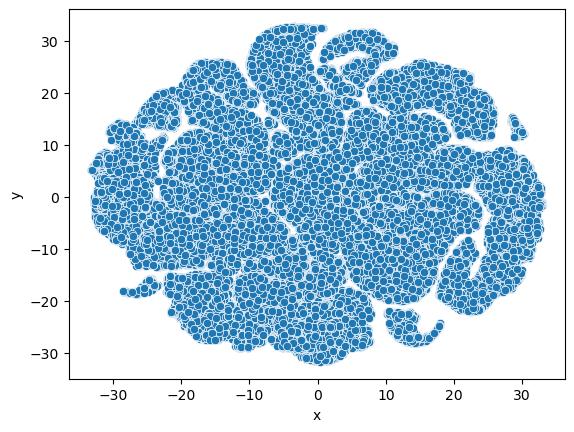

In [52]:
df_tsne_data['x'] = tnse_features[:,0]
df_tsne_data['y'] = tnse_features[:,1]

import seaborn as sns
sns.scatterplot(x='x',y='y',data=df_tsne_data)
plt.show()

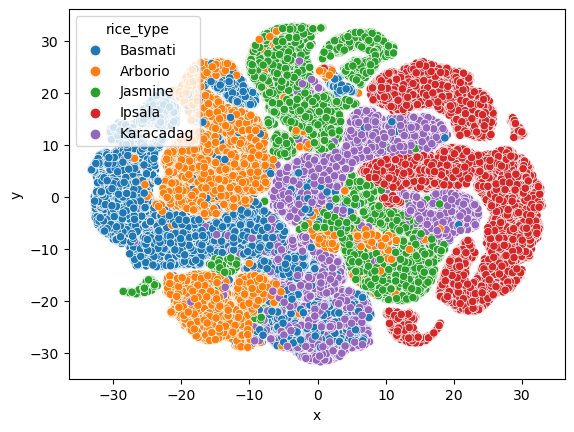

In [53]:
df_tsne_data['rice_type']=df['CLASS']
sns.scatterplot(x='x',y='y',hue = 'rice_type', data=df_tsne_data)
plt.show()

Dimensionality reduction using LDA

In [19]:
df_lda = df.drop(['CLASS'], axis=1)
x_lda = df_lda
x_lda

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0       7805    437.915    209.8215     48.0221        0.9735   99.6877   
1       7503    340.757    138.3361     69.8417        0.8632   97.7400   
2       5124    314.617    141.9803     46.5784        0.9447   80.7718   
3       7990    437.085    201.4386     51.2245        0.9671  100.8622   
4       7433    342.893    140.3350     68.3927        0.8732   97.2830   
...      ...        ...         ...         ...           ...       ...   
74995   5551    285.911    114.1695     62.9079        0.8345   84.0699   
74996   7696    322.703    121.3900     81.1375        0.7438   98.9892   
74997   7579    339.295    136.3125     71.2866        0.8524   98.2338   
74998  15174    489.502    200.9486     97.6282        0.8740  138.9969   
74999  12931    452.635    185.5138     90.2651        0.8736  128.3131   

       SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  ALLdaub4V  ALLdaub4L  \
0        0.9775         7985  0.3547        4.3693  ...     0.4733   113.9924   
1        0.9660         7767  0.6637        1.9807  ...     0.4182   105.7055   
2        0.9721         5271  0.4760        3.0482  ...     0.4606   109.7155   
3        0.9659         8272  0.6274        3.9325  ...     0.4797   116.5405   
4        0.9831         7561  0.6006        2.0519  ...     0.4332   107.7502   
...         ...          ...     ...           ...  ...        ...        ...   
74995    0.9846         5638  0.6418        1.8149  ...     0.4094   103.9529   
74996    0.9868         7799  0.7309        1.4961  ...     0.4507   108.9778   
74997    0.9805         7730  0.6399        1.9122  ...     0.4255   106.0881   
74998    0.9766        15537  0.7903        2.0583  ...     0.4648   119.2037   
74999    0.9760        13249  0.7640        2.0552  ...     0.4742   121.4198   

       ALLdaub4a  ALLdaub4b  ALLdaub4Y  ALLdaub4Cb  ALLdaub4Cr  ALLdaub4XX  \
0        65.0610    59.5989   104.8552     67.8779     63.0828      0.3673   
1        64.3685    62.2084    96.8375     65.5371     63.5832      0.3014   
2        62.6423    58.7439   100.2352     68.9753     59.8342      0.3233   
3        64.9069    60.2562   107.2560     67.3298     63.2237      0.3880   
4        64.7071    61.3549    98.8704     66.2048     63.5378      0.3184   
...          ...        ...        ...         ...         ...         ...   
74995    64.9225    62.4355    95.2780     65.5114     64.4457      0.2895   
74996    65.4571    59.9502   100.2301     67.5089     63.6028      0.3335   
74997    64.1869    61.3876    97.1585     66.2445     63.0596      0.3028   
74998    63.3545    64.8200   109.3027     63.3122     63.5967      0.3970   
74999    63.5424    65.2355   111.4580     63.0129     63.9117      0.4162   

       ALLdaub4YY  ALLdaub4ZZ  
0          0.3793      0.4733  
1          0.3144      0.3641  
2          0.3445      0.4448  
3          0.4020      0.4904  
4          0.3303      0.3928  
...           ...         ...  
74995      0.2997      0.3455  
74996      0.3426      0.4257  
74997      0.3164      0.3761  
74998      0.4215      0.4469  
74999      0.4414      0.4626  

[75000 rows x 106 columns]

In [20]:
y_lda = df['CLASS']
y_lda.values

array(['Basmati', 'Arborio', 'Jasmine', ..., 'Arborio', 'Ipsala',
       'Ipsala'], dtype=object)

In [21]:
x_lda = x_lda.replace([np.inf, -np.inf], np.nan)  # first replace inf values with NaNs
max_value = x_lda.max().max()
x_lda = x_lda.fillna(max_value)

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
x_r2 = lda.fit(x_lda,y_lda).transform(x_lda)

In [23]:
x_r2

array([[-7.23735611,  8.03413226],
       [-1.35314899, -5.79297359],
       [-7.12889868,  3.7574585 ],
       ...,
       [-0.62267086, -6.15652969],
       [14.72407267,  3.6609821 ],
       [16.87834963,  3.65189907]])

In [24]:
lda.explained_variance_ratio_

array([0.52793349, 0.32969069])

In [25]:
x_r3 = pd.DataFrame(data=x_r2)
x_r3['y']=y_lda
x_r3

0         1          y
0      -7.237356  8.034132    Basmati
1      -1.353149 -5.792974    Arborio
2      -7.128899  3.757459    Jasmine
3      -7.191670  7.522058    Basmati
4      -0.912289 -4.783761    Arborio
...          ...       ...        ...
74995  -1.692211 -8.096886    Arborio
74996  -2.516993 -9.668940  Karacadag
74997  -0.622671 -6.156530    Arborio
74998  14.724073  3.660982     Ipsala
74999  16.878350  3.651899     Ipsala

[75000 rows x 3 columns]

<AxesSubplot:xlabel='0', ylabel='1'>

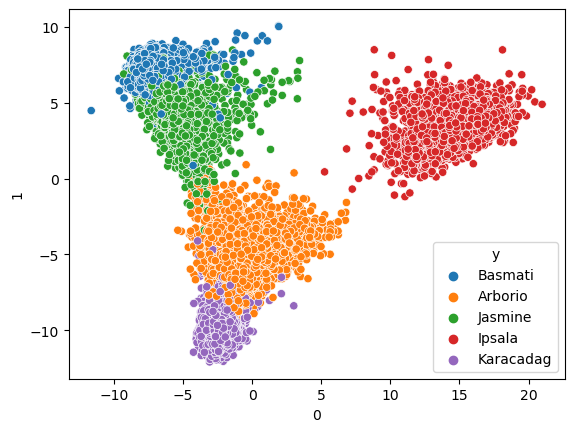

In [26]:
sns.scatterplot(x=0,y=1,hue = 'y', data=x_r3)

Building Classification Model(s) with Feature Selection:

In [77]:
ml_x = x_lda
ml_y = y_lda
ml_x.shape,ml_y.shape

((75000, 106), (75000,))

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ml_x,ml_y,test_size=0.30,random_state=30)

Random forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,random_state=42)
rf_clf.fit(x_train,y_train)
rf_clf.score(x_test,y_test)

y_pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2%}'.format(accuracy))

Accuracy: 99.85%


In [83]:
# Confusion Matrix

confusion_matrix(y_test, y_pred)

array([[4459,    0,    0,    5,    3],
       [   0, 4599,    0,    9,    0],
       [   1,    0, 4478,    0,    0],
       [   7,    1,    0, 4428,    0],
       [   8,    0,    0,    0, 4502]], dtype=int64)

In [84]:
# Generate a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Arborio       1.00      1.00      1.00      4467
     Basmati       1.00      1.00      1.00      4608
      Ipsala       1.00      1.00      1.00      4479
     Jasmine       1.00      1.00      1.00      4436
   Karacadag       1.00      1.00      1.00      4510

    accuracy                           1.00     22500
   macro avg       1.00      1.00      1.00     22500
weighted avg       1.00      1.00      1.00     22500



In [89]:
#imp features
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rf_clf, threshold='median')
sfm.fit(x_train, y_train)
# Get the feature indices of the selected features
selected_features = sfm.get_support(indices=True)

# Get the names of the selected features
feature_names = list(x_train.columns[selected_features])

# Get the feature importances of the selected features
feature_importances = rf_clf.feature_importances_[selected_features]

# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print the feature names and importances
print("Selected Features:")
for i in range(len(feature_names)):
    print("%d) %s (%.2f%%)" % (i+1, feature_names[indices[i]], feature_importances[indices[i]]*100))

Selected Features:
1) SHAPEFACTOR_3 (8.59%)
2) ECCENTRICITY (6.44%)
3) COMPACTNESS (5.48%)
4) ROUNDNESS (5.38%)
5) ASPECT_RATIO (5.17%)
6) StdDevB (4.68%)
7) MAJOR_AXIS (4.55%)
8) entropyCr (4.19%)
9) ALLdaub4b (3.94%)
10) entropyB (3.41%)
11) StdDevCb (3.01%)
12) entropyA (2.86%)
13) meanCb (2.80%)
14) PERIMETER (2.62%)
15) meanB (2.23%)
16) meanS (2.08%)
17) SHAPEFACTOR_1 (1.87%)
18) entropyRR (1.85%)
19) CONVEX_AREA (1.81%)
20) MINOR_AXIS (1.73%)
21) entropyY (1.69%)
22) EQDIASQ (1.61%)
23) SHAPEFACTOR_2 (1.51%)
24) ALLdaub4S (1.18%)
25) ALLdaub4a (1.04%)
26) ALLdaub4Cb (1.02%)
27) StdDevXX (0.95%)
28) meanA (0.93%)
29) AREA (0.91%)
30) entropyL (0.90%)
31) ALLdaub4H (0.86%)
32) StdDevS (0.86%)
33) StdDevYY (0.77%)
34) entropyS (0.69%)
35) StdDevA (0.67%)
36) kurtosisS (0.57%)
37) meanH (0.52%)
38) skewCb (0.52%)
39) skewB (0.51%)
40) StdDevY (0.51%)
41) kurtosisV (0.50%)
42) skewS (0.42%)
43) meanCr (0.40%)
44) kurtosisXX (0.40%)
45) skewA (0.34%)
46) kurtosisY (0.33%)
47) ALLdaub4